### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- After completing each Assignment Activity, back up your work to a safe location. This would allow you to revert to a previous state in the case of making a mistake in the code, or deleting a section by mistake. (A simple way of doing this is to save or mail a compressed version at frequent intervals).

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1

## Plan your approach

### Context
You are part of a team of data analysts that was contracted by the National Health Services (NHS), a publicly funded healthcare system in England. The team has been provided with internal and external data and a number of high-level business questions  concerning the **utilisation of services**, **missed appointments**, and the **potential value of using external data sources such as Twitter (now rebranded as X)**. Your role is to refine the business questions to actionable analytic questions based on your review of the available data. You will then plan and perform the exploratory data analysis and present the insights to the respective stakeholders.
The NHS must expand its infrastructure and resources to match its increasing population capacity. For this, it needs to budget correctly. When deciding on budget allotment, the NHS must understand the utilisation trends of each component in its network.
Some stakeholders feel that the NHS’s capacity should be increased while others feel that, based on current trends in utilisation, the current capacity is adequate and that efforts to make better use of existing infrastructure and resources are sufficient. Your team has been tasked to explore the available data and offer suggestions and recommendations based on your observations.

**Hints:**
 - The NHS incurs significant, potentially avoidable, costs when patients miss general practitioner (GP) appointments.
 - Therefore, reducing or eliminating missed appointments would be beneficial financially as well as socially. The government needs a data-informed approach to decide how best to handle this problem. At this stage of the project, the two main questions posed by the NHS are:
    1. Has there been adequate staff and capacity in the networks?
    2. What was the actual utilisation of resources?

### Questions
1. What is the number of locations, service settings, context types, national categories, and appointment statuses in the data sets?
2. What is the date range of the provided data sets, and which service settings reported the most appointments for a specific period?
3. What is the number of appointments and records per month?
4. What monthly and seasonal trends are evident, based on the number of appointments for service settings, context types, and national categories?
5. What are the top trending hashtags (#) on the supplied Twitter data set and how can this be used in the decision-making process?
6. Was there adequate staff and capacity in the networks?
7. What was the actual utilisation of resources?
8. What insights can be gained by looking at missed appointments?
9. What are the most important patterns visible in the data relating to the use case? 
10. What insights can be gained from the data, and what recommendations can be made to the NHS based on these insights?

### Data Inspection
***Total No. of Appts*** 
 - actual_duration is recorded from Dec-2021 to Jun-2022 with a total count of 168m appointments
 - appointments_regional is recorded from Jan-2020 to Jun-2022 with a total count of 743m appointments. 
    - In the the period from Dec-2021 to Jun-2022 the total count of appointments are 183m out of which 168m were marked as status "Attended" whose detailed data is in actual_duration. 
 - All data is across 106 Sub ICBs with unique location names+codes based across 42 ICBs
 - national_categories is recorded from Aug-2021 to Jun-2022 with a total of 296m appointments which matches with the sum of all appts. in appointments_regional for the same period
     - In the period from Dec-2021 to Jun-2022 the total count of appointments are 183m which matches with regional data

***Seasonal Trends***


# Assignment activity 2

### Prepare your workstation

In [12]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [14]:
# Determine whether there are missing values.

# Create a new DataFrame and use the isna() function to find missing values.
ad_na = ad[ad.isna().any(axis=1)]

# View the shape of the DataFrame.
ad_na.shape

# 0 rows implies that there are no missing values in this Dataframe

(0, 8)

In [15]:
# Determine the metadata of the data set.
print(ad.info(),'\n')

# Convert data type of appointment_date from string to date, specified dayfirst and the format for parsing to be completed successfully
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], dayfirst=True, format='%d-%b-%y')
ad['appointment_month'] = ad['appointment_date'].dt.to_period('M')
print(ad.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None 

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_du

In [16]:
# Determine the descriptive statistics of the data set.
print(f"Time period is from {ad['appointment_date'].min()} to {ad['appointment_date'].max()}",'\n')
ad.describe(include='all')

Time period is from 2021-12-01 00:00:00 to 2022-06-30 00:00:00 



,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,appointment_month
count,137793,137793,137793,137793,137793,137793,137793,137793.000000,137793
unique,106,106,106,42,7,NaN,7,NaN,7
top,26A,E38000239,NHS Norfolk and Waveney ICB - 26A,E54000057,E40000010,NaN,Unknown / Data Quality,NaN,2022-03
freq,1484,1484,1484,12668,33112,NaN,20161,NaN,21236
mean,NaN,NaN,NaN,NaN,NaN,2022-03-16 19:31:17.868977664,NaN,1219.080011,NaN
min,NaN,NaN,NaN,NaN,NaN,2021-12-01 00:00:00,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2022-01-25 00:00:00,NaN,194.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,2022-03-16 00:00:00,NaN,696.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,2022-05-09 00:00:00,NaN,1621.000000,NaN
max,NaN,NaN,NaN,NaN,NaN,2022-06-30 00:00:00,NaN,15400.000000,NaN


In [17]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [18]:
# Determine whether there are missing values.

# Create a new DataFrame and use the isna() function to find missing values.
ar_na = ar[ar.isna().any(axis=1)]

# View the shape of the DataFrame.
ar_na.shape

# 0 rows implies that there are no missing values in this Dataframe

(0, 7)

In [19]:
# Determine the metadata of the data set.
print(ar.info(),'\n')

# Convert data type of appointment_month from string to datetime and further display as a Period with YYYY-MM format, specified the format for parsing to be completed successfully
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'], format='%Y-%m').dt.to_period('M')
print(ar.dtypes,'\n')

# View the data frame
ar.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
None 

icb_ons_code                            object
appointment_month                    period[M]
appointment_status                      object
hcp_type                                object
appointment_mode                        object
time_between_book_and

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [20]:
# Determine the descriptive statistics of the data set.
print(f"Time period is from {ar['appointment_month'].min()} to {ar['appointment_month'].max()}",'\n')
ar.describe(include='all')

Time period is from 2020-01 to 2022-06 



,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
count,596821,596821,596821,596821,596821,596821,596821.000000
unique,42,30,3,3,5,8,NaN
top,E54000057,2020-03,Attended,Other Practice staff,Face-to-Face,Same Day,NaN
freq,54527,21350,232137,241557,180410,95502,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1244.601857
std,NaN,NaN,NaN,NaN,NaN,NaN,5856.887042
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,47.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,308.000000


In [21]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [22]:
# Determine whether there are missing values.

# Create a new DataFrame and use the isna() function to find missing values.
nc_na = nc[nc.isna().any(axis=1)]

# View the shape of the DataFrame.
nc_na.shape

# 0 rows implies that there are no missing values in this Dataframe

(0, 8)

In [23]:
# Determine the metadata of the data set.
print(nc.info(),'\n')

# Convert data type of appointment_month from string to datetime and further display as a Period with YYYY-MM format, specified the format for parsing to be completed successfully
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'], format='%Y-%m').dt.to_period('M')
print(nc.dtypes,'\n')

# View the data frame
nc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB
None 

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_cate

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [24]:
# Determine the descriptive statistics of the data set.
print(f"Time period is from {nc['appointment_date'].min()} to {nc['appointment_date'].max()}",'\n')
nc.describe(include='all')

Time period is from 2021-08-01 00:00:00 to 2022-06-30 00:00:00 



,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
count,817394,817394,817394,817394,817394,817394,817394.000000,817394
unique,NaN,42,106,5,3,18,NaN,11
top,NaN,E54000057,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Inconsistent Mapping,NaN,2022-03
freq,NaN,59180,13007,359274,700481,89494,NaN,82822
mean,2022-01-16 00:50:35.860796160,NaN,NaN,NaN,NaN,NaN,362.183684,NaN
min,2021-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,2021-10-25 00:00:00,NaN,NaN,NaN,NaN,NaN,7.000000,NaN
50%,2022-01-18 00:00:00,NaN,NaN,NaN,NaN,NaN,25.000000,NaN
75%,2022-04-07 00:00:00,NaN,NaN,NaN,NaN,NaN,128.000000,NaN
max,2022-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,16590.000000,NaN


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [27]:
# Determine the number of locations.
cnt_sub_icbs = nc['sub_icb_location_name'].nunique()
print(f"There are {cnt_sub_icbs} locations",'\n')

There are 106 locations 



**Question 2:** What are the five locations with the highest number of appointments?



In [29]:
# Determine the top five locations based on record count.

# Aggregating data on total number of appointments by location
sum_cnt_appts = pd.NamedAgg(column='count_of_appointments', aggfunc='sum')
total_appts_loc = nc.groupby('sub_icb_location_name').agg(total_appts=sum_cnt_appts).reset_index()

print(f"There are {nc['sub_icb_location_name'].nunique()} locations with top five based on total no. of appts as follows:\n")
total_appts_loc.sort_values(by='total_appts',ascending=False)[0:5]


# appts_sub_icbs = pd.pivot_table(nc, values='count_of_appointments', index=['sub_icb_location_name'],aggfunc='sum') \
# appts_by_location = appts_sub_icbs.sort_values(by=['count_of_appointments'],ascending=False) \
# print('Top five locations by sum of all appts are:')
# appts_by_location[0:5]

There are 106 locations with top five based on total no. of appts as follows:



,sub_icb_location_name,total_appts
76,NHS North West London ICB - W2U3Z,12142390
67,NHS North East London ICB - A3A8R,9588891
47,NHS Kent and Medway ICB - 91Q,9286167
36,NHS Hampshire and Isle Of Wight ICB - D9Y0V,8288102
82,NHS South East London ICB - 72Q,7850170


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [31]:
# Determine the number of service settings.

# Aggregating data on total number of appointments by service setting
# sum_cnt_appts = pd.NamedAgg(column='count_of_appointments', aggfunc='sum') - No longer used
total_appts_ss = nc.groupby('service_setting')[['count_of_appointments']].sum().reset_index()
total_appts_ss = total_appts_ss.rename(columns={'count_of_appointments':'total_appts'})

print(f"There are {nc['service_setting'].nunique()} service settings:\n")
total_appts_ss.sort_values(by='total_appts',ascending=False)\
                

# nc['service_setting'].value_counts())

There are 5 service settings:



,service_setting,total_appts
1,General Practice,270811691
4,Unmapped,11080810
3,Primary Care Network,6557386
2,Other,5420076
0,Extended Access Provision,2176807


In [32]:
# Determine the number of context types.

# Aggregating data on total number of appointments by context type
# sum_cnt_appts = pd.NamedAgg(column='count_of_appointments', aggfunc='sum') - No longer used
total_appts_ct = nc.groupby('context_type')[['count_of_appointments']].sum().reset_index()
total_appts_ct = total_appts_ct.rename(columns={'count_of_appointments':'total_appts'})

print(f"There are {nc['context_type'].nunique()} context types:\n")
total_appts_ct.sort_values(by='total_appts',ascending=False)

# nc['context_type'].value_counts()

There are 3 context types:



,context_type,total_appts
0,Care Related Encounter,257075158
1,Inconsistent Mapping,27890802
2,Unmapped,11080810


In [33]:
# Determine the number of national categories.

# Aggregating data on total number of appointments by national category
# sum_cnt_appts = pd.NamedAgg(column='count_of_appointments', aggfunc='sum')
total_appts_nc = nc.groupby('national_category')[['count_of_appointments']].sum().reset_index()
total_appts_nc = total_appts_nc.rename(columns={'count_of_appointments':'total_appts'})

print(f"There are {nc['national_category'].nunique()} national categories:\n")
total_appts_nc.sort_values(by='total_appts',ascending=False)

# nc['national_category'].value_counts()

There are 18 national categories:



,national_category,total_appts
4,General Consultation Routine,97271522
3,General Consultation Acute,53691150
2,Clinical Triage,41546964
11,Planned Clinics,28019748
7,Inconsistent Mapping,27890802
10,Planned Clinical Procedure,25702694
15,Unmapped,11080810
16,Unplanned Clinical Activity,3055794
6,Home Visit,2144452
14,Structured Medication Review,1858379


In [34]:
# Determine the number of appointment statuses.

# Aggregating data on total number of appointments by its status
# sum_cnt_appts = pd.NamedAgg(column='count_of_appointments', aggfunc='sum')
total_appts_as = ar.groupby('appointment_status')[['count_of_appointments']].sum().reset_index()
total_appts_as = total_appts_as.rename(columns={'count_of_appointments':'total_appts'})

print(f"There are {ar['appointment_status'].nunique()} appt statuses:\n")
total_appts_as.sort_values(by='total_appts',ascending=False)

There are 3 appt statuses:



,appointment_status,total_appts
0,Attended,677755876
2,Unknown,34137416
1,DNA,30911233


# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [39]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad['appointment_date'].head()

0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]

In [40]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [41]:
# Change the date format of ad['appointment_date'].

# View the DateFrame.
ad['appointment_date'].head()

0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]

In [42]:
# Change the date format of ar['appointment_date'].


# View the DateFrame.
ar['appointment_month'].head()
print(ar['appointment_month'].min())
print(ar['appointment_month'].max())

2020-01
2022-06


In [43]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
print(ad['appointment_month'].min())
print(ad['appointment_month'].max())

2021-12
2022-06


In [44]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
print(nc['appointment_month'].min())
print(nc['appointment_month'].max())

2021-08
2022-06


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [46]:
# For each of these service settings, determine the number of records available for the period and the location. 

# Filter records for North West London
nc_NW = nc[nc['sub_icb_location_name'].str.contains('North West')]
# Filter the records that exist in a specific date range
nc_NW_2022 = nc_NW[(nc_NW['appointment_date'] >= '2022-01-01') & (nc_NW['appointment_date'] <= '2022-06-01')]

# View the output.
# nc_NW_2022.head()
# nc_NW_2022['service_setting'].value_counts()

# Total No. of appointments in NW London from 1-Jan-22 to 1Jun-22 by Service Setting
appts_NW_ss_2022 = nc_NW_2022.groupby('service_setting')[['count_of_appointments']].sum().reset_index()
appts_NW_ss_2022 = appts_NW_ss_2022.rename(columns={'count_of_appointments':'total_appts'})

print(f"For NW London there are {nc_NW_2022['service_setting'].nunique()} service settings \
and the total no. of appts from {nc_NW_2022['appointment_date'].min()} \
to {nc_NW_2022['appointment_date'].max()} is broken down \
for each service setting as follows:\n")

appts_NW_ss_2022.sort_values(by='total_appts',ascending=False)

For NW London there are 5 service settings and the total no. of appts from 2022-01-01 00:00:00 to 2022-06-01 00:00:00 is broken down for each service setting as follows:



,service_setting,total_appts
1,General Practice,4804239
4,Unmapped,391106
2,Other,152897
3,Primary Care Network,109840
0,Extended Access Provision,98159


**Question 3:** Which month had the highest number of appointments?

In [48]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
monthly_cnt_appts = nc.groupby('appointment_month')[['count_of_appointments']].sum().reset_index()
monthly_cnt_appts = monthly_cnt_appts.rename(columns={'count_of_appointments':'total_appts'})
monthly_cnt_appts.sort_values(by='total_appts',ascending=False)

,appointment_month,total_appts
3,2021-11,30405070
2,2021-10,30303834
7,2022-03,29595038
1,2021-09,28522501
9,2022-05,27495508
10,2022-06,25828078
5,2022-01,25635474
6,2022-02,25355260
4,2021-12,25140776
8,2022-04,23913060


**Question 4:** What was the total number of records per month?

In [50]:
# Total number of records per month.

# Summarising No. of Records for actual_duration
print(f"The total no. of records per month for actual_duration \
is summarised as follows:\n{ad['appointment_month'].value_counts(sort = False)}\n")

# Summarising No. of Records for appointments_regional
print(f"The total no. of records per month for appointments_regional \
is summarised as follows:\n\
{ar['appointment_month'].value_counts(sort = False)}\n")

# Summarising No. of Records for national_categories
print(f"The total no. of records per month for national_categories \
is summarised as follows:\n\
{nc['appointment_month'].value_counts(sort = False)}\n")

The total no. of records per month for actual_duration is summarised as follows:
appointment_month
2021-12    19507
2022-01    19643
2022-02    18974
2022-03    21236
2022-04    19078
2022-05    20128
2022-06    19227
Freq: M, Name: count, dtype: int64

The total no. of records per month for appointments_regional is summarised as follows:
appointment_month
2020-01    20889
2020-02    20689
2020-03    21350
2020-04    19124
2020-05    18338
2020-06    18844
2020-07    19502
2020-08    19247
2020-09    20043
2020-10    20122
2020-11    19675
2020-12    19394
2021-01    19319
2021-02    18949
2021-03    19369
2021-04    19452
2021-05    19384
2021-06    19814
2021-07    19899
2021-08    19786
2021-09    20441
2021-10    20562
2021-11    20766
2021-12    20393
2022-01    20225
2022-02    20133
2022-03    20532
2022-04    20073
2022-05    20276
2022-06    20231
Freq: M, Name: count, dtype: int64

The total no. of records per month for national_categories is summarised as follows:
appointmen

# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [54]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [56]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'].dtypes

period[M]

In [57]:
# Aggregate on monthly level and determine the sum of records per month.
total_appts_ss_monthly = nc.groupby(['appointment_month','service_setting'])[['count_of_appointments']].sum().reset_index()
total_appts_ss_monthly = total_appts_ss_monthly.rename(columns={'appointment_month':'appt_month',
                                                               'count_of_appointments':'total_appts'})

# Converting appt_month to datetime for lineplots
total_appts_ss_monthly['appt_month'] = total_appts_ss_monthly['appt_month'].dt.to_timestamp()
total_appts_ss_monthly = total_appts_ss_monthly.sort_values('total_appts', ascending=False)

# View output.
print(total_appts_ss_monthly.dtypes)
total_appts_ss_monthly.head()

appt_month         datetime64[ns]
service_setting            object
total_appts                 int64
dtype: object


,appt_month,service_setting,total_appts
16,2021-11-01,General Practice,27767889
11,2021-10-01,General Practice,27606171
36,2022-03-01,General Practice,27187368
6,2021-09-01,General Practice,25940821
46,2022-05-01,General Practice,25238620


**Service settings:**

<Axes: xlabel='appt_month', ylabel='total_appts'>

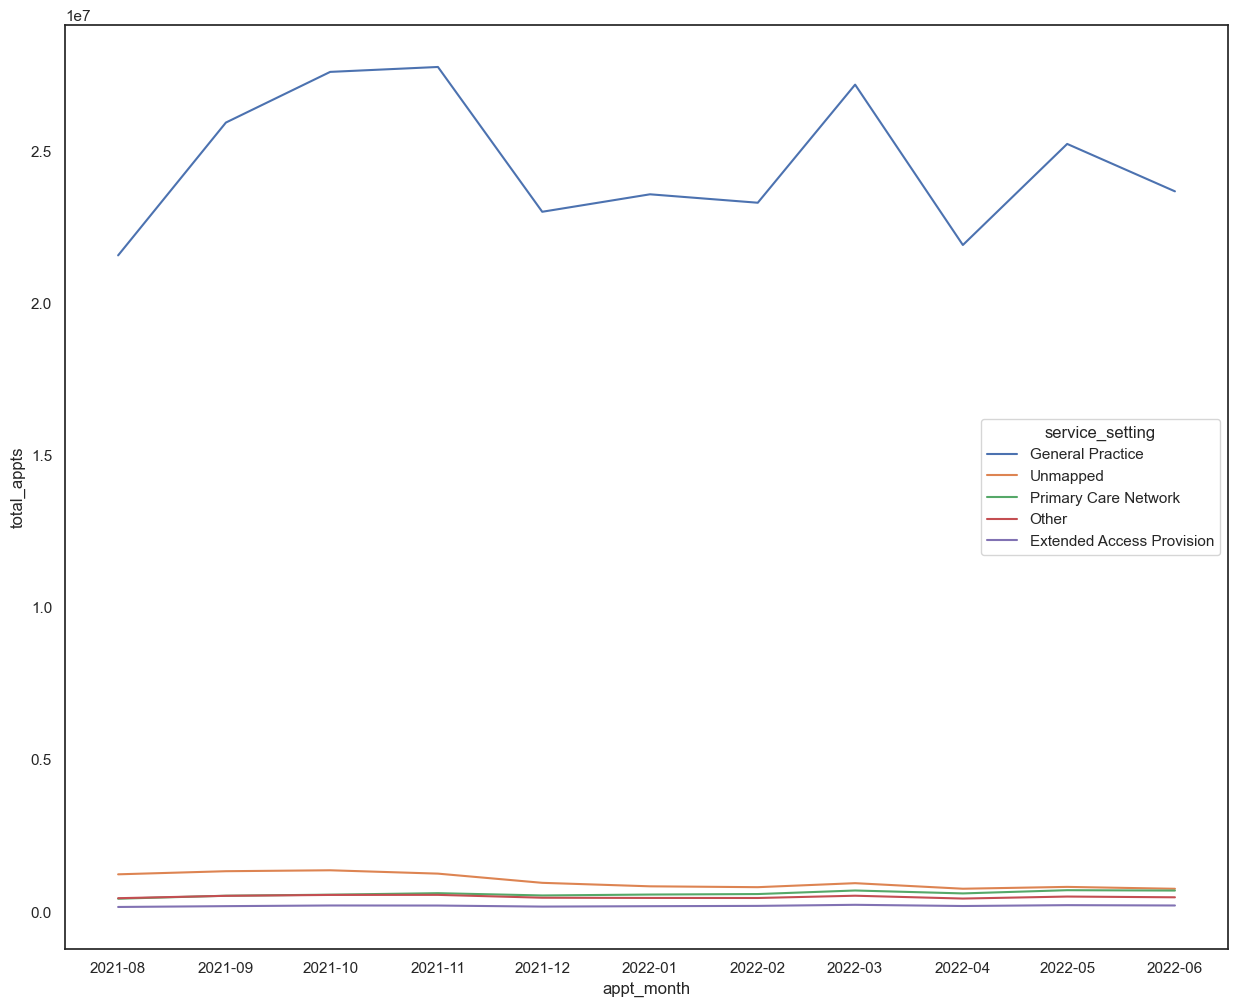

In [59]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
sns.lineplot(data=total_appts_ss_monthly, x='appt_month', y='total_appts', hue='service_setting')

**Context types:**

In [61]:
# Aggregate on monthly level and determine the sum of records per month.
total_appts_ct_monthly = nc.groupby(['appointment_month','context_type'])[['count_of_appointments']].sum().reset_index()
total_appts_ct_monthly = total_appts_ct_monthly.rename(columns={'appointment_month':'appt_month',
                                                               'count_of_appointments':'total_appts'})

# Converting appt_month to datetime for lineplots
total_appts_ct_monthly['appt_month'] = total_appts_ct_monthly['appt_month'].dt.to_timestamp()
total_appts_ct_monthly = total_appts_ct_monthly.sort_values('total_appts', ascending=False)

# View output.
print(total_appts_ct_monthly.dtypes)
total_appts_ct_monthly.head()

appt_month      datetime64[ns]
context_type            object
total_appts              int64
dtype: object


,appt_month,context_type,total_appts
9,2021-11-01,Care Related Encounter,26282778
6,2021-10-01,Care Related Encounter,26125201
21,2022-03-01,Care Related Encounter,25928850
3,2021-09-01,Care Related Encounter,24404251
27,2022-05-01,Care Related Encounter,24101243


<Axes: xlabel='appt_month', ylabel='total_appts'>

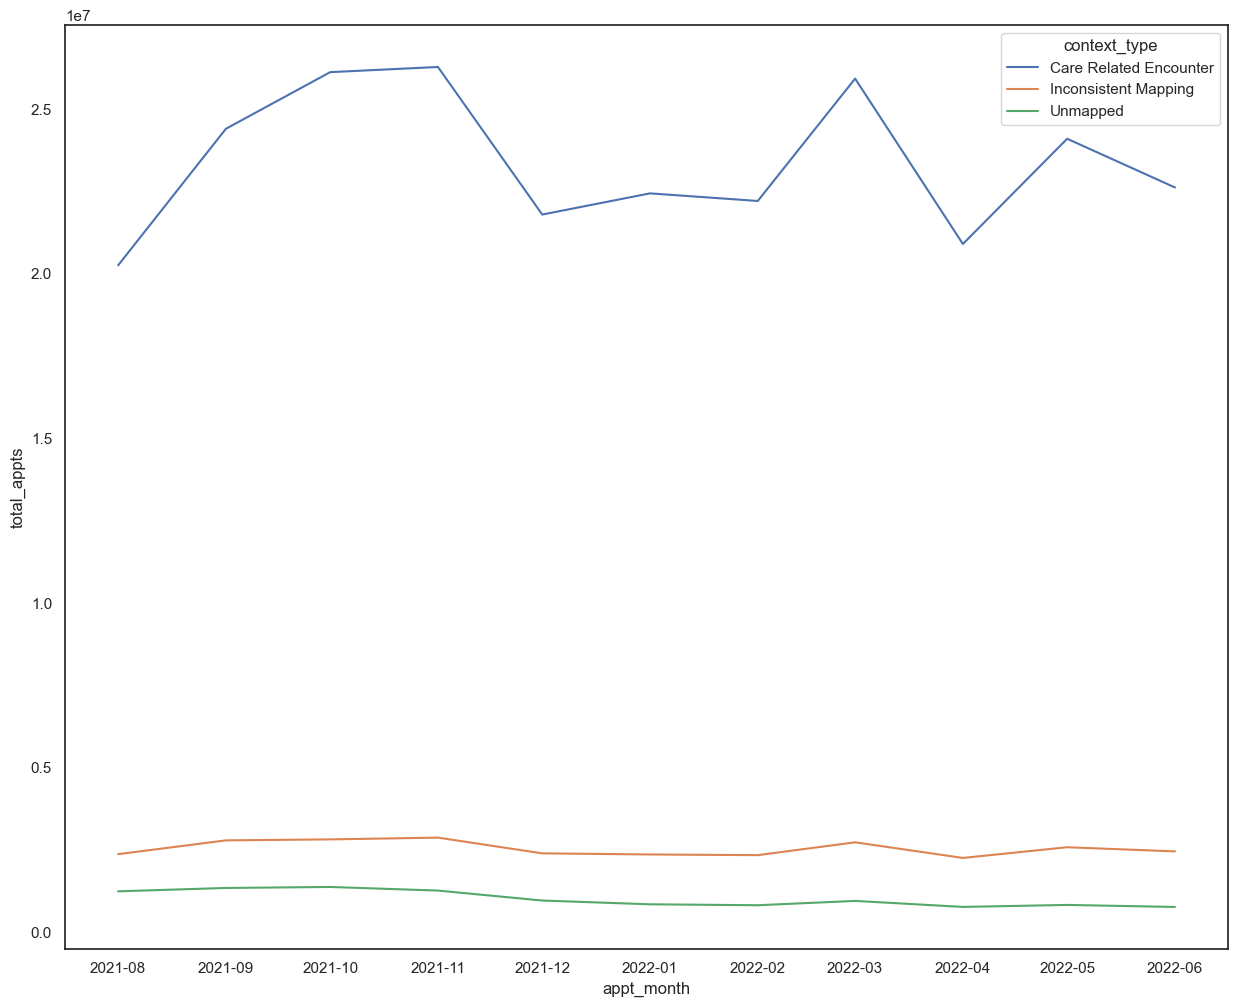

In [62]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
sns.lineplot(data=total_appts_ct_monthly, x='appt_month', y='total_appts', hue='context_type')

**National categories:**

In [64]:
# Aggregate on monthly level and determine the sum of records per month.
total_appts_nc_monthly = nc.groupby(['appointment_month','national_category'])[['count_of_appointments']].sum().reset_index()
total_appts_nc_monthly = total_appts_nc_monthly.rename(columns={'appointment_month':'appt_month',
                                                               'count_of_appointments':'total_appts'})

# Converting appt_month to datetime for lineplots
total_appts_nc_monthly['appt_month'] = total_appts_nc_monthly['appt_month'].dt.to_timestamp()
total_appts_nc_monthly = total_appts_nc_monthly.sort_values('total_appts', ascending=False)

# View output.
print(total_appts_nc_monthly.dtypes)
total_appts_nc_monthly.head()

appt_month           datetime64[ns]
national_category            object
total_appts                   int64
dtype: object


,appt_month,national_category,total_appts
130,2022-03-01,General Consultation Routine,10074249
58,2021-11-01,General Consultation Routine,9778682
166,2022-05-01,General Consultation Routine,9320538
40,2021-10-01,General Consultation Routine,9256788
22,2021-09-01,General Consultation Routine,9060243


<Axes: xlabel='appt_month', ylabel='total_appts'>

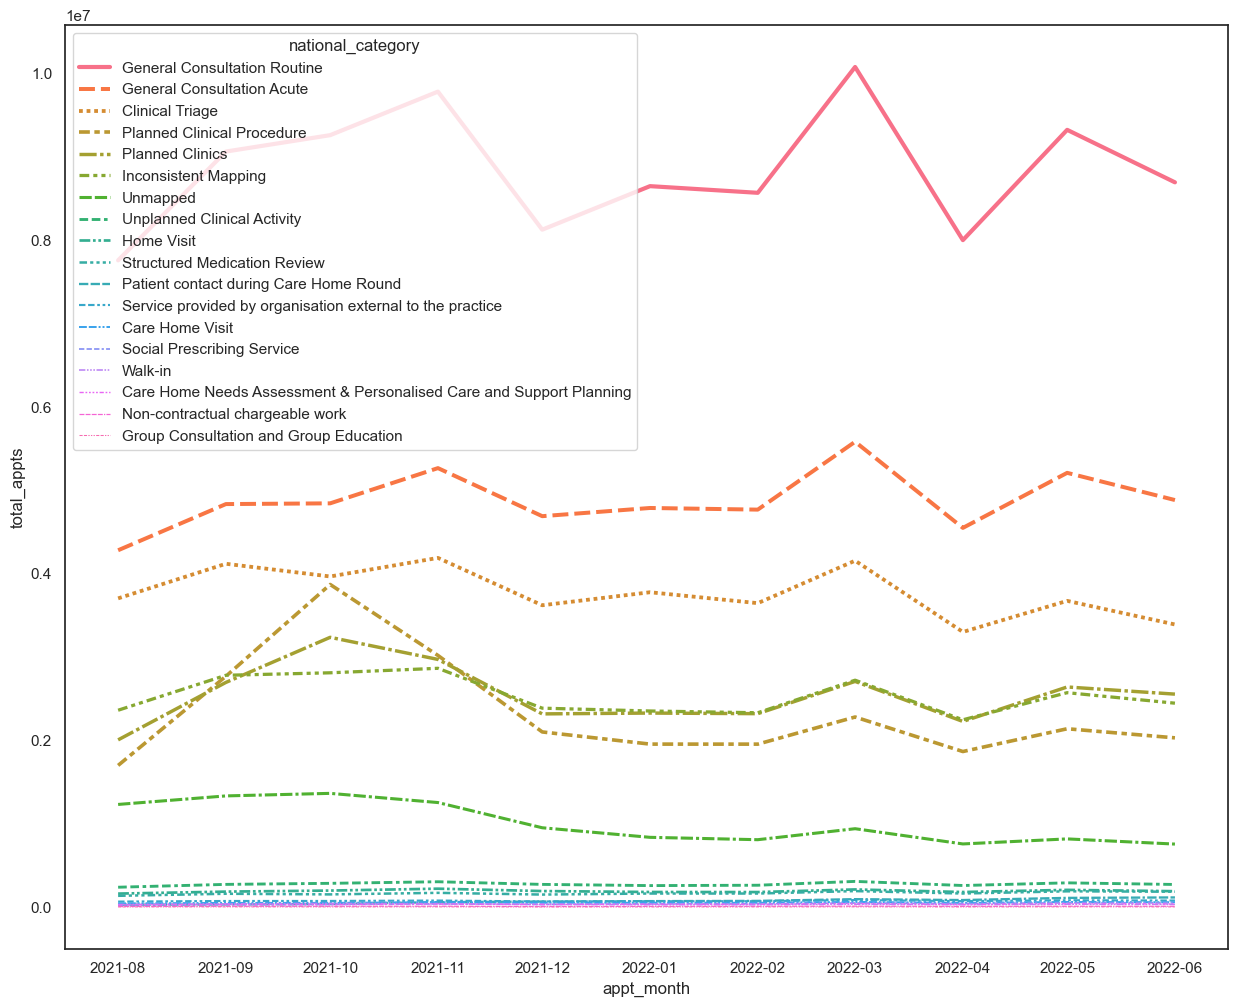

In [65]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
sns.lineplot(data=total_appts_nc_monthly,
             x='appt_month',
             y='total_appts',
             hue='national_category',
             size='national_category',
             style='national_category')

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

**Summer (June to August 2021):**

In [68]:
# Create a separate data set that can be used in future weeks. 
total_appts_ss_summer = total_appts_ss_monthly.loc[total_appts_ss_monthly['appt_month'].dt.month.isin([6,7,8])]
total_appts_ss_autumn = total_appts_ss_monthly.loc[total_appts_ss_monthly['appt_month'].dt.month.isin([9,10,11])]
total_appts_ss_winter = total_appts_ss_monthly.loc[total_appts_ss_monthly['appt_month'].dt.month.isin([12,1,2])]
total_appts_ss_spring = total_appts_ss_monthly.loc[total_appts_ss_monthly['appt_month'].dt.month.isin([3,4,5])]

"""
# Convert to Specific Months for visualisation of months across different years as x-axis on lineplots
total_appts_ss_summer['appt_month'] = total_appts_ss_summer['appt_month'].dt.strftime('%b')
total_appts_ss_autumn['appt_month'] = total_appts_ss_autumn['appt_month'].dt.strftime('%b')
total_appts_ss_winter['appt_month'] = total_appts_ss_winter['appt_month'].dt.strftime('%b')
total_appts_ss_spring['appt_month'] = total_appts_ss_spring['appt_month'].dt.strftime('%b')
total_appts_ss_summer = total_appts_ss_summer.sort_values('appt_month', ascending=False)
total_appts_ss_autumn = total_appts_ss_autumn.sort_values('appt_month', ascending=False)
total_appts_ss_winter = total_appts_ss_winter.sort_values('appt_month')
total_appts_ss_spring = total_appts_ss_spring.sort_values('appt_month', ascending=False)
"""

# View output.
print(total_appts_ss_summer.head(),'\n')
print(total_appts_ss_autumn.head(),'\n')
print(total_appts_ss_winter.head(),'\n')
print(total_appts_ss_spring.head())

   appt_month       service_setting  total_appts
51 2022-06-01      General Practice     23680374
1  2021-08-01      General Practice     21575852
4  2021-08-01              Unmapped      1233843
54 2022-06-01              Unmapped       758640
53 2022-06-01  Primary Care Network       700599 

   appt_month   service_setting  total_appts
16 2021-11-01  General Practice     27767889
11 2021-10-01  General Practice     27606171
6  2021-09-01  General Practice     25940821
14 2021-10-01          Unmapped      1366656
9  2021-09-01          Unmapped      1336115 

   appt_month   service_setting  total_appts
26 2022-01-01  General Practice     23583053
31 2022-02-01  General Practice     23305934
21 2021-12-01  General Practice     23008818
24 2021-12-01          Unmapped       954257
29 2022-01-01          Unmapped       839562 

   appt_month   service_setting  total_appts
36 2022-03-01  General Practice     27187368
46 2022-05-01  General Practice     25238620
41 2022-04-01  General Pr

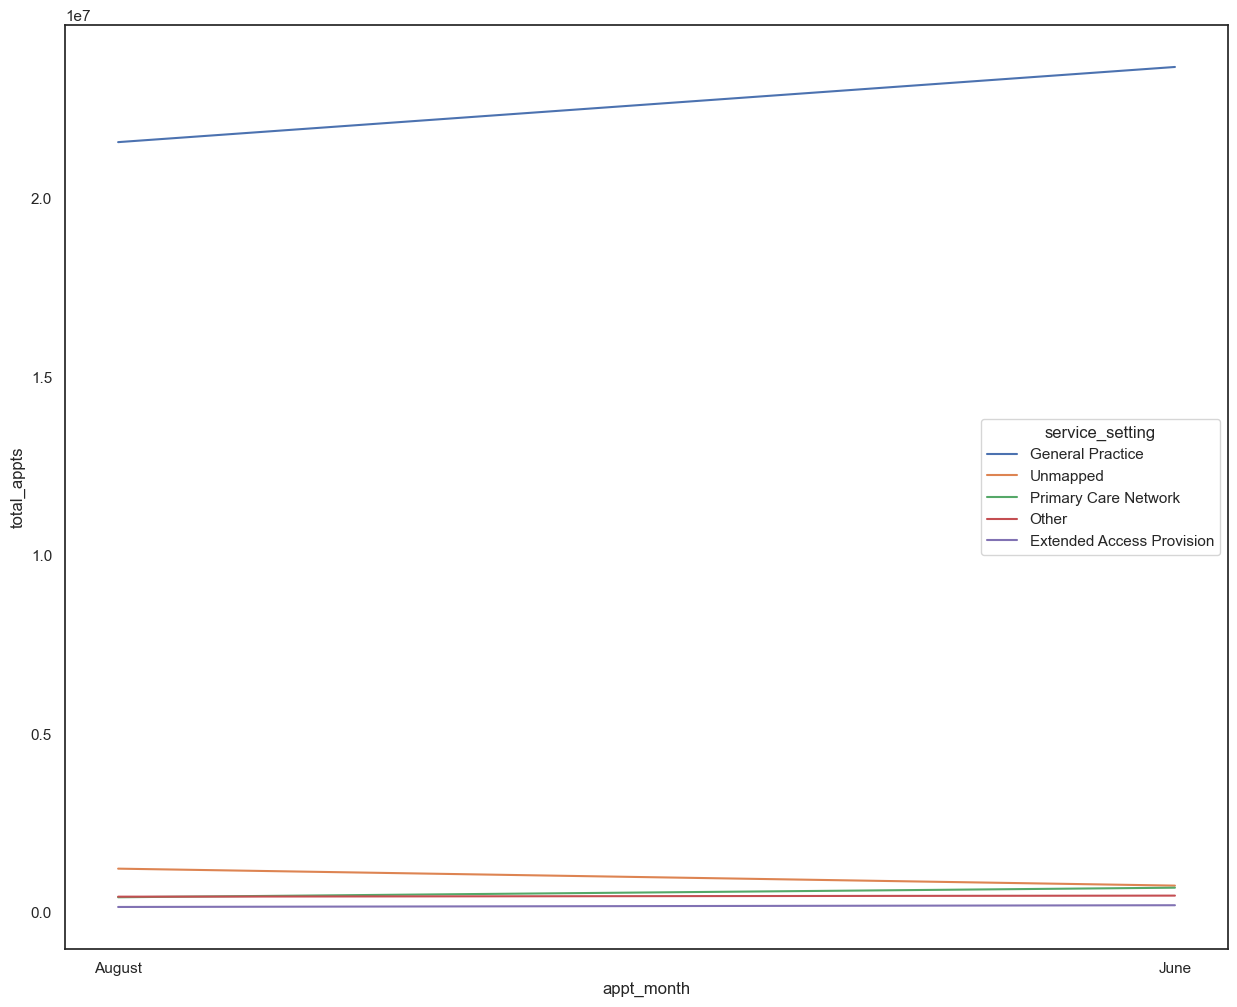

In [69]:
# Look at June to August 2021 in more detail to allow a closer look.
# Create a lineplot.
hue_order_summer = total_appts_ss_summer.groupby('service_setting')['total_appts'].mean().sort_values(ascending=False).index
ss_summer = sns.lineplot(data=total_appts_ss_summer,
                         x=total_appts_ss_summer['appt_month'].dt.month_name().sort_values(),
                         y='total_appts',
                         hue='service_setting',
                         hue_order = hue_order_summer)

**Autumn (September to November 2021):**

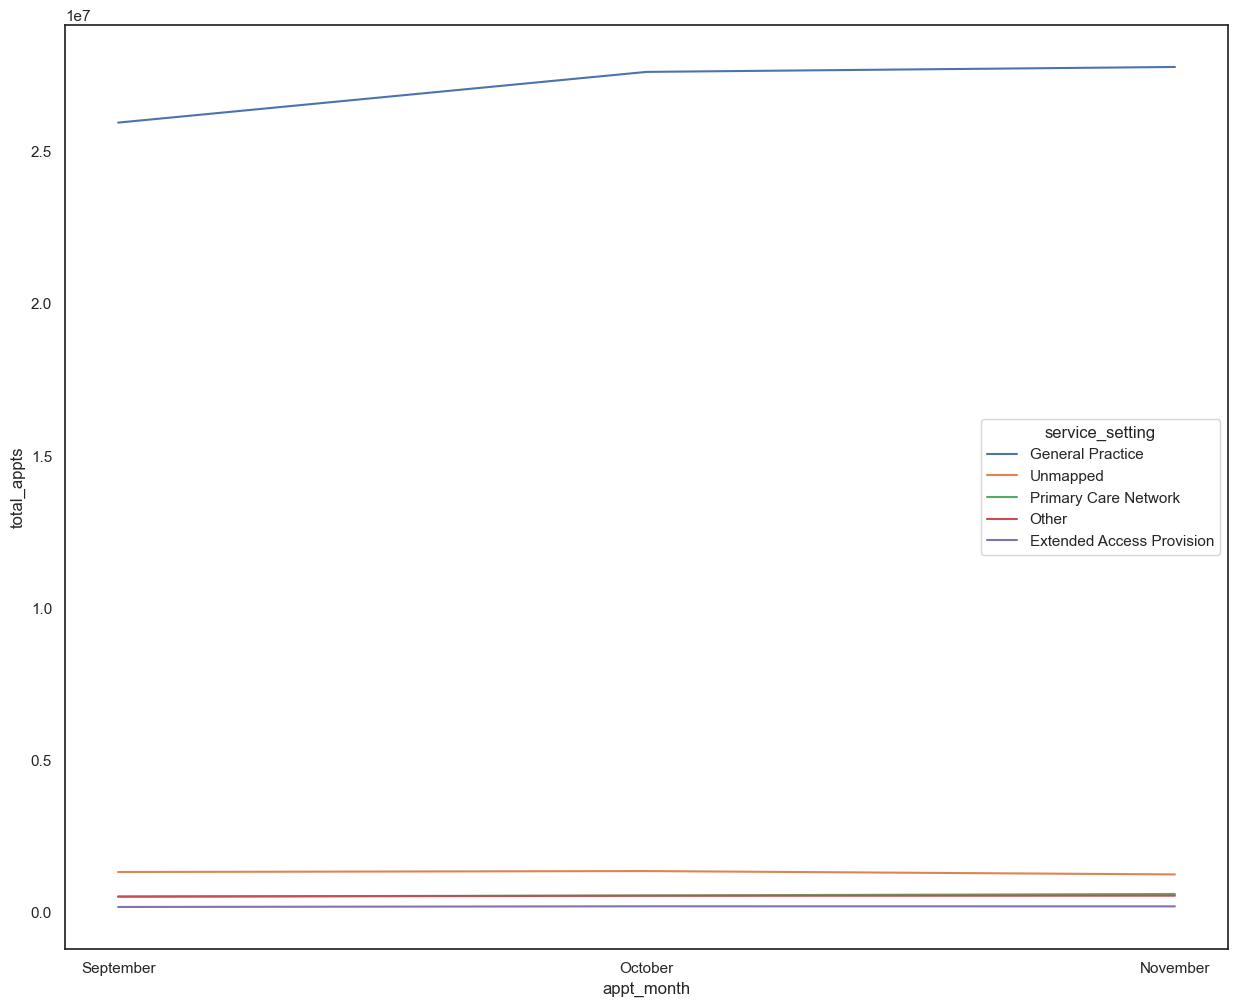

In [71]:
# Look at September to November 2021 in more detail to allow a closer look.
# Create a lineplot.
hue_order_autumn = total_appts_ss_autumn.groupby('service_setting')['total_appts'].mean().sort_values(ascending=False).index
ss_autumn = sns.lineplot(data=total_appts_ss_autumn,
                         x=total_appts_ss_autumn['appt_month'].dt.month_name().sort_values(),
                         y='total_appts',
                         hue='service_setting',
                         hue_order = hue_order_autumn)
# ss_autumn.set_xticklabels(('Sept','Oct','Nov'))

**Winter (December to February 2022):**

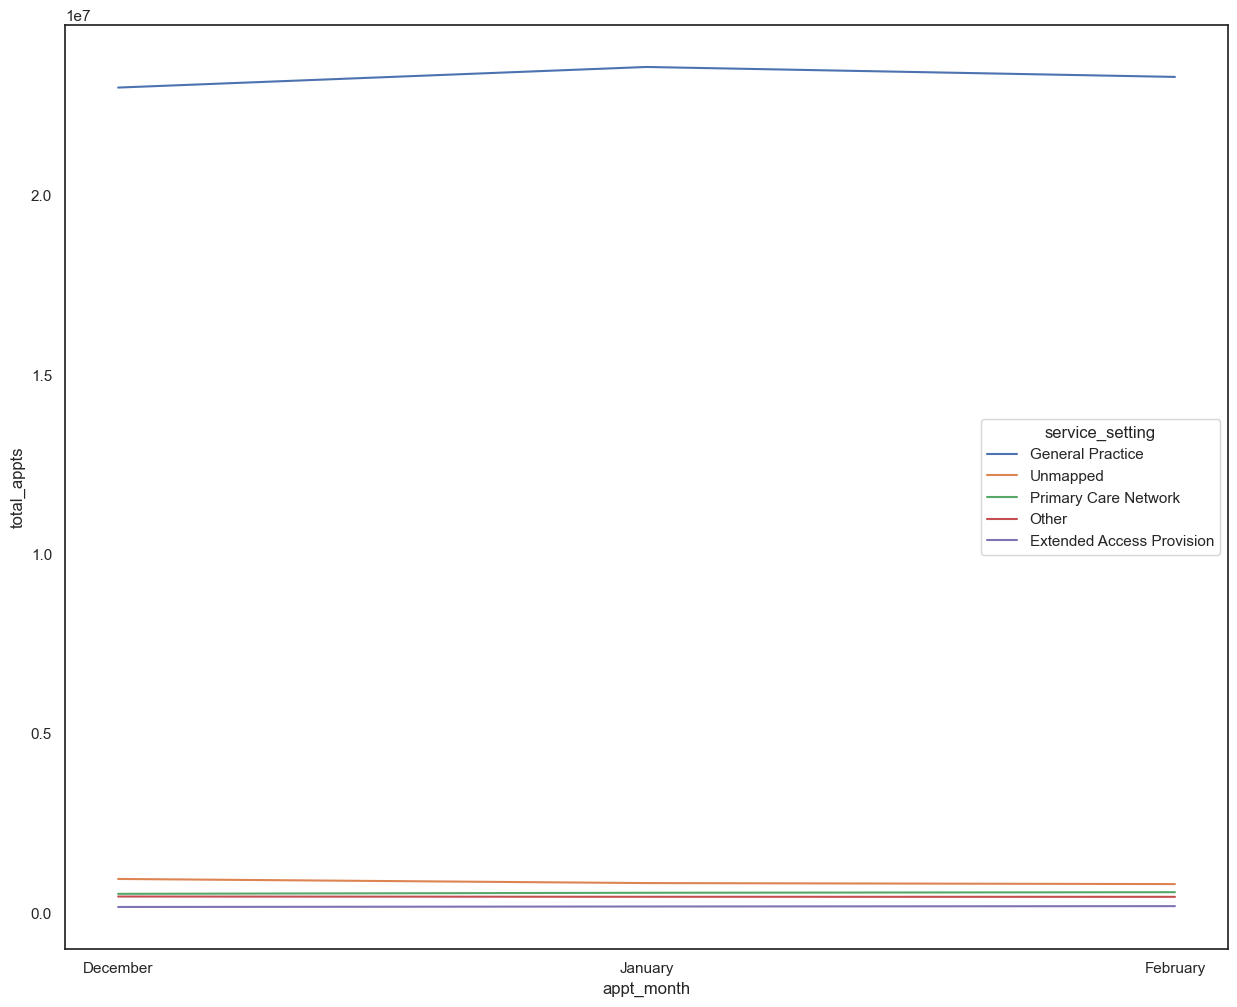

In [73]:
# Look at December to February 2022 in more detail to allow a closer look.
# Create a lineplot.
hue_order_winter = total_appts_ss_winter.groupby('service_setting')['total_appts'].mean().sort_values(ascending=False).index
ss_winter = sns.lineplot(data=total_appts_ss_winter,
             x=total_appts_ss_winter['appt_month'].dt.month_name().sort_values(),
             y='total_appts',
             hue='service_setting',
             hue_order=hue_order_winter)

**Spring (March to May 2022):**

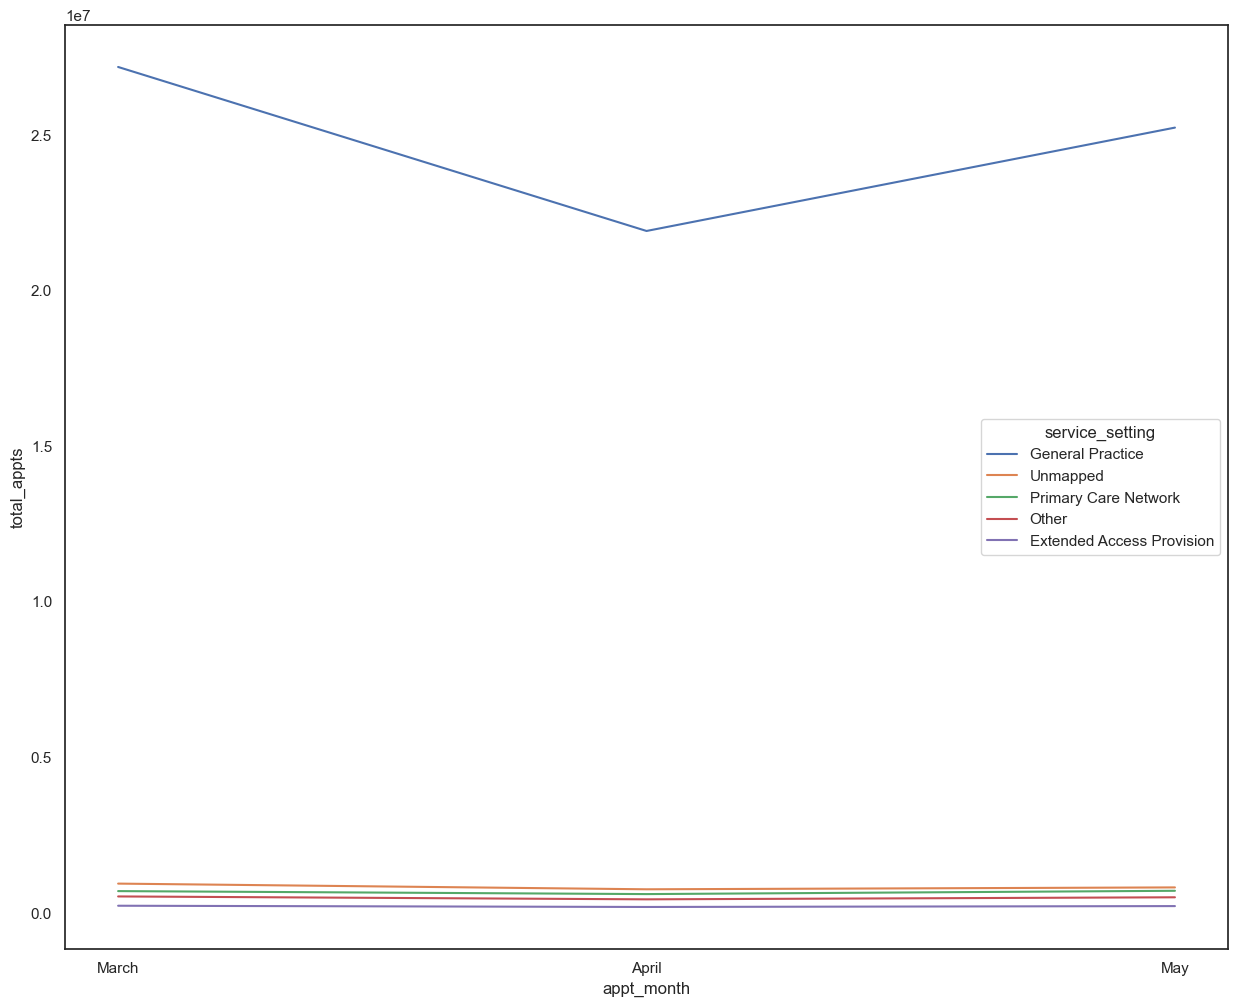

In [75]:
# Look at March to May 2022 in more detail to allow a closer look.
# Create a lineplot.
hue_order_spring = total_appts_ss_spring.groupby('service_setting')['total_appts'].mean().sort_values(ascending=False).index
ss_spring = sns.lineplot(data=total_appts_ss_spring,
                         x=total_appts_ss_spring['appt_month'].dt.month_name().sort_values(),
                         y='total_appts',
                         hue='service_setting',
                         hue_order=hue_order_spring)

# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [79]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [80]:
# Load the data set.


# View the DataFrame.


In [81]:
# Explore the metadata.


In [82]:
# Explore the data set.


In [83]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.


In [84]:
# Create a new DataFrame containing only the text.


# View the DataFrame.


In [85]:
# Loop through the messages, and create a list of values containing the # symbol.


In [86]:
# Display the first 30 records.


In [87]:
# Convert the series to a DataFrame in preparation for visualisation.


# Rename the columns.


In [88]:
# Fix the count datatype.


# View the result.


In [89]:
# Display records where the count is larger than 10.


In [90]:
# Create a Seaborn barplot indicating records with a count >10 records.


In [91]:
# Create the plot.


# View the barplot.


# 

# Assignment activity 6

### Make recommendations to the NHS. 

In [95]:
# Prepare your workstation.

# Importing libraries
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Load the appointments_regional.csv file.
appt_reg = ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
print(appt_reg.shape, '\n')
print(appt_reg.isna().sum(), '\n') # Checking missing values
print(appt_reg.dtypes, '\n') # Checking column data types
appt_reg.head()

(596821, 7) 

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64 

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object 



,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [96]:
# appt_reg['appointment_month'].max() - appt_reg['appointment_month'].min() 
# The above calculation generates error due to string object for appointment_month column

# Convert appointment_month column from string to datetime format
# appt_reg['appointment_month'] = pd.to_datetime(appt_reg['appointment_month'])
appt_reg = appt_reg.astype({'appointment_month':'datetime64[ns]'})
print(appt_reg['appointment_month'].dtype, '\n')

# Print the min and max dates.
min_appt_month = appt_reg['appointment_month'].min()
max_appt_month = appt_reg['appointment_month'].max()

rng_appt_month = (max_appt_month.year - min_appt_month.year)*12 + (max_appt_month.month - min_appt_month.month + 1)

print(date.strftime(min_appt_month, '%Y-%m'),'\n')
print(date.strftime(max_appt_month, '%Y-%m'),'\n')
print(rng_appt_month)

datetime64[ns] 

2020-01 

2022-06 

30


In [97]:
# Filter the data set to only look at data from 2021-08 onwards.
appt_reg_11 = appt_reg.loc[appt_reg['appointment_month'] >= '2021-08-01'].reset_index(drop = True)

# View the DataFrame.
print(appt_reg_11.shape, '\n')
print(appt_reg_11.dtypes, '\n')
print(appt_reg_11['appointment_month'].describe(),'\n')
print(appt_reg_11['count_of_appointments'].sum(),'\n')
appt_reg_11.head()

(223418, 7) 

icb_ons_code                                 object
appointment_month                    datetime64[ns]
appointment_status                           object
hcp_type                                     object
appointment_mode                             object
time_between_book_and_appointment            object
count_of_appointments                         int64
dtype: object 

count                           223418
mean     2021-12-31 04:29:35.298320128
min                2021-08-01 00:00:00
25%                2021-10-01 00:00:00
50%                2022-01-01 00:00:00
75%                2022-04-01 00:00:00
max                2022-06-01 00:00:00
Name: appointment_month, dtype: object 

296046770 



,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2021-08-01,Attended,GP,Face-to-Face,1 Day,6553
1,E54000034,2021-08-01,Attended,GP,Face-to-Face,15 to 21 Days,2390
2,E54000034,2021-08-01,Attended,GP,Face-to-Face,2 to 7 Days,10547
3,E54000034,2021-08-01,Attended,GP,Face-to-Face,22 to 28 Days,937
4,E54000034,2021-08-01,Attended,GP,Face-to-Face,8 to 14 Days,4961


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [99]:
# Create an aggregated data set to review the different features.
ar11_agg = appt_reg_11.groupby(['appointment_month',
                                'hcp_type',
                                'appointment_status',
                                'appointment_mode',
                                'time_between_book_and_appointment'])\
                                [['count_of_appointments']].\
                                sum().reset_index()

# View the DataFrame.
print(ar11_agg.dtypes,'\n')
print(ar11_agg.head(),'\n')
ar11_agg.describe(include = 'all')

appointment_month                    datetime64[ns]
hcp_type                                     object
appointment_status                           object
appointment_mode                             object
time_between_book_and_appointment            object
count_of_appointments                         int64
dtype: object 

  appointment_month hcp_type appointment_status appointment_mode  \
0        2021-08-01       GP           Attended     Face-to-Face   
1        2021-08-01       GP           Attended     Face-to-Face   
2        2021-08-01       GP           Attended     Face-to-Face   
3        2021-08-01       GP           Attended     Face-to-Face   
4        2021-08-01       GP           Attended     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                 507835  
1                    15  to 21 Days                 194726  
2                       2 to 7 Days                 959486  
3                  

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
count,3754,3754,3754,3754,3754,3.754000e+03
unique,NaN,3,3,5,8,NaN
top,NaN,GP,Attended,Face-to-Face,Same Day,NaN
freq,NaN,1309,1285,787,494,NaN
mean,2021-12-31 15:50:09.270111744,NaN,NaN,NaN,NaN,7.886169e+04
min,2021-08-01 00:00:00,NaN,NaN,NaN,NaN,1.000000e+00
25%,2021-10-01 00:00:00,NaN,NaN,NaN,NaN,2.510000e+02
50%,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,1.753000e+03
75%,2022-04-01 00:00:00,NaN,NaN,NaN,NaN,1.359050e+04
max,2022-06-01 00:00:00,NaN,NaN,NaN,NaN,4.157782e+06


In [100]:
# Determine the total number of appointments per month.
total_appts_ar11_monthly = appt_reg_11.groupby('appointment_month')\
                                               [['count_of_appointments']].\
                                               sum().reset_index()

# Add a new column to indicate the average utilisation of services.
max_capacity = 1200000

# Monthly aggregate / 30 to get to a daily value.
total_appts_ar11_monthly['util_rate'] = round((total_appts_ar11_monthly\
                                                 ['count_of_appointments']\
                                                 /30/max_capacity)*100, 1)


# View the DataFrame.
total_appts_ar11_monthly

,appointment_month,count_of_appointments,util_rate
0,2021-08-01,23852171,66.3
1,2021-09-01,28522501,79.2
2,2021-10-01,30303834,84.2
3,2021-11-01,30405070,84.5
4,2021-12-01,25140776,69.8
5,2022-01-01,25635474,71.2
6,2022-02-01,25355260,70.4
7,2022-03-01,29595038,82.2
8,2022-04-01,23913060,66.4
9,2022-05-01,27495508,76.4


<Axes: xlabel='appointment_month', ylabel='count_of_appointments'>

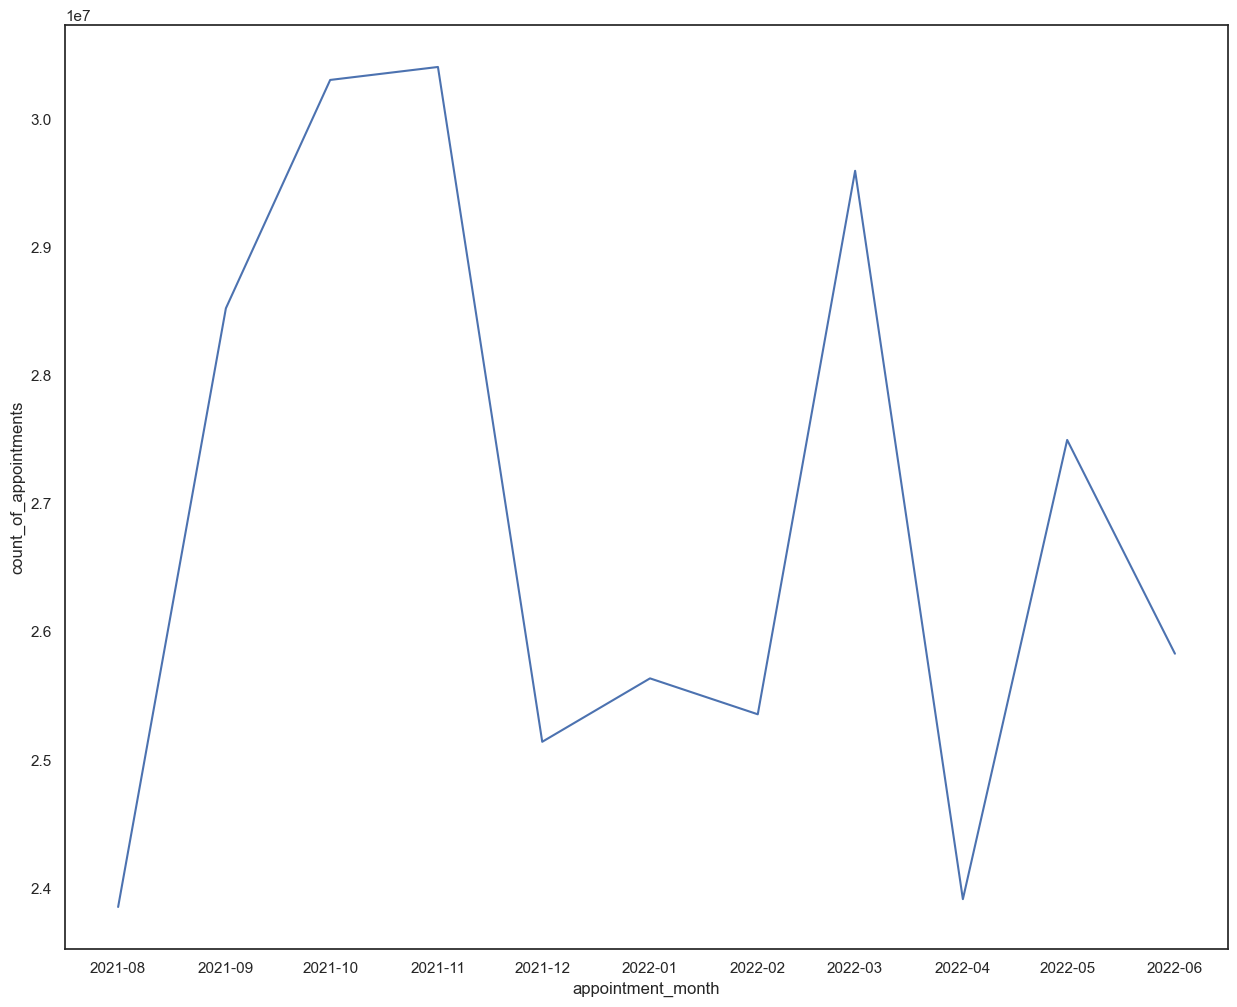

In [101]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.

# Create a lineplot with Seaborn.
sns.lineplot(data=total_appts_ar11_monthly,
             x='appointment_month',
             y='count_of_appointments')

<Axes: xlabel='appointment_month', ylabel='util_rate'>

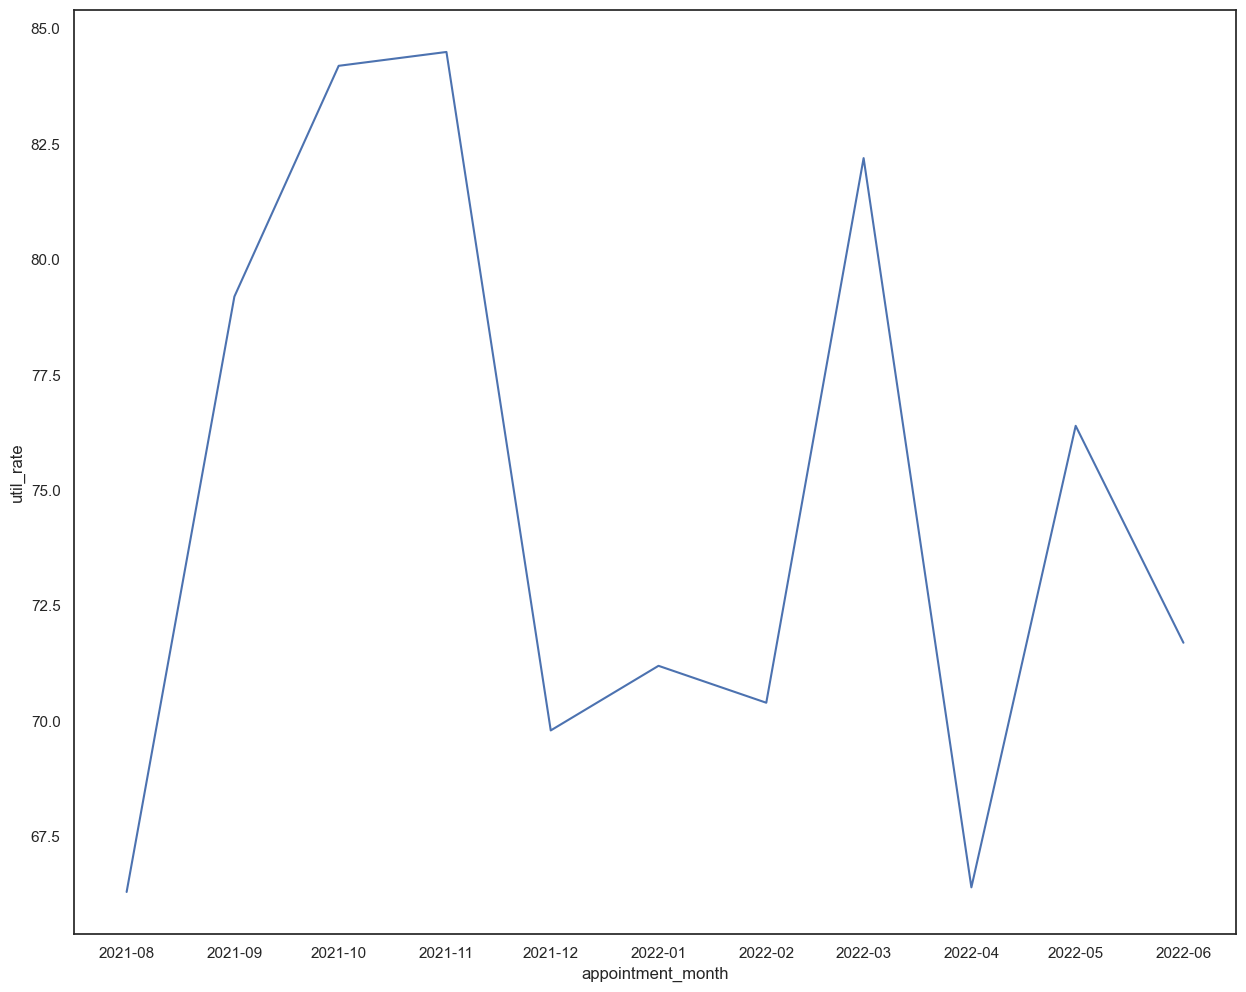

In [102]:
# Plot monthly capacity utilisation.


# Create a lineplot.
sns.lineplot(data=total_appts_ar11_monthly,
             x='appointment_month',
             y='util_rate')

**Question 2:** How do the healthcare professional types differ over time?

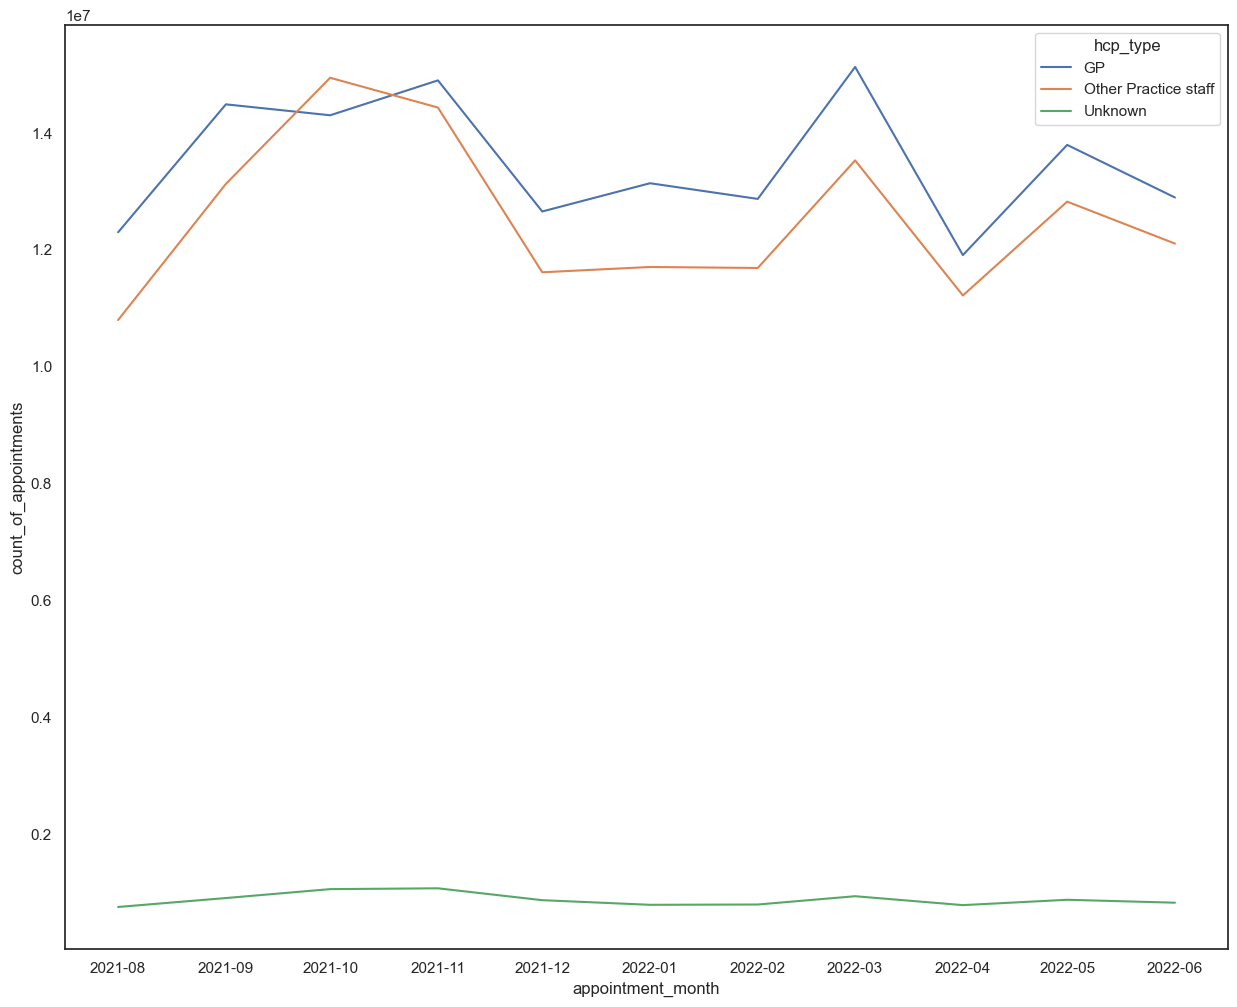

In [104]:
# Create a line plot to answer the question.
hcp_appts_ar11_monthly = appt_reg_11.groupby(['appointment_month','hcp_type'])\
                                               [['count_of_appointments']].\
                                               sum().reset_index()
hcp_appts_ar11_monthly = hcp_appts_ar11_monthly.sort_values('count_of_appointments', ascending=False)

hcp_appts = sns.lineplot(data=hcp_appts_ar11_monthly,
                         x='appointment_month',
                         y='count_of_appointments',
                         hue='hcp_type')

# hcp_appts_ar11_monthly

**Question 3:** Are there significant changes in whether or not visits are attended?

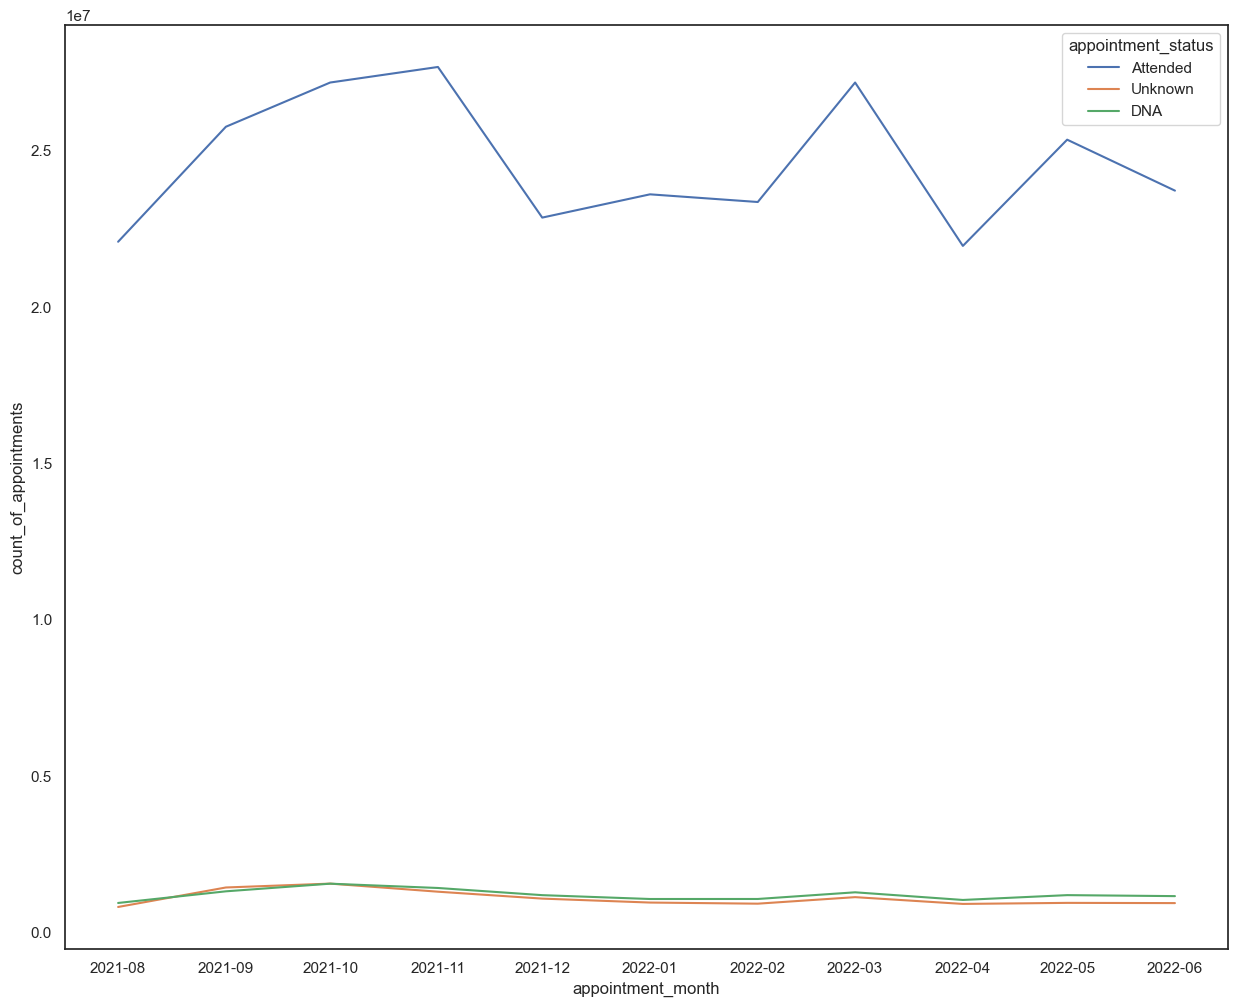

In [106]:
# Create a line plot to answer the question.
status_appts_ar11_monthly = appt_reg_11.groupby(['appointment_month','appointment_status'])\
                                               [['count_of_appointments']].\
                                               sum().reset_index()
status_appts_ar11_monthly = status_appts_ar11_monthly.sort_values('count_of_appointments', ascending=False)

status_appts = sns.lineplot(data=status_appts_ar11_monthly, x='appointment_month', y='count_of_appointments', hue='appointment_status')

**Question 4:** Are there changes in terms of appointment type and the busiest months?

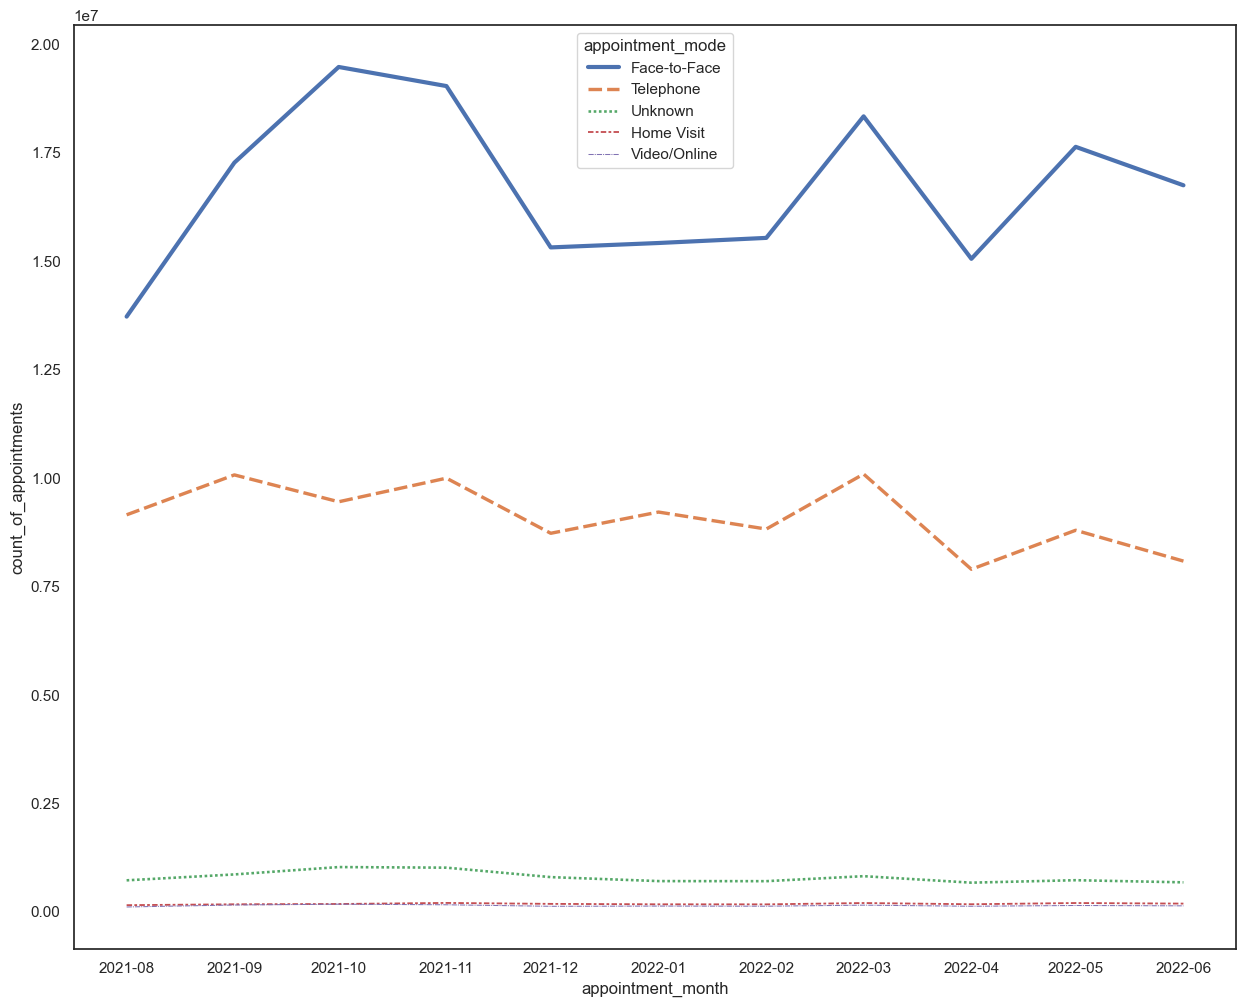

In [108]:
# Create a line plot to answer the question.
mode_appts_ar11_monthly = appt_reg_11.groupby(['appointment_month','appointment_mode'])\
                                               [['count_of_appointments']].\
                                               sum().reset_index()
mode_appts_ar11_monthly = mode_appts_ar11_monthly.sort_values('count_of_appointments', ascending=False)

mode_appts = sns.lineplot(data=mode_appts_ar11_monthly,
                          x='appointment_month',
                          y='count_of_appointments',
                          hue='appointment_mode',
                          size='appointment_mode',
                          style='appointment_mode')

**Question 5:** Are there any trends in time between booking and appointment?

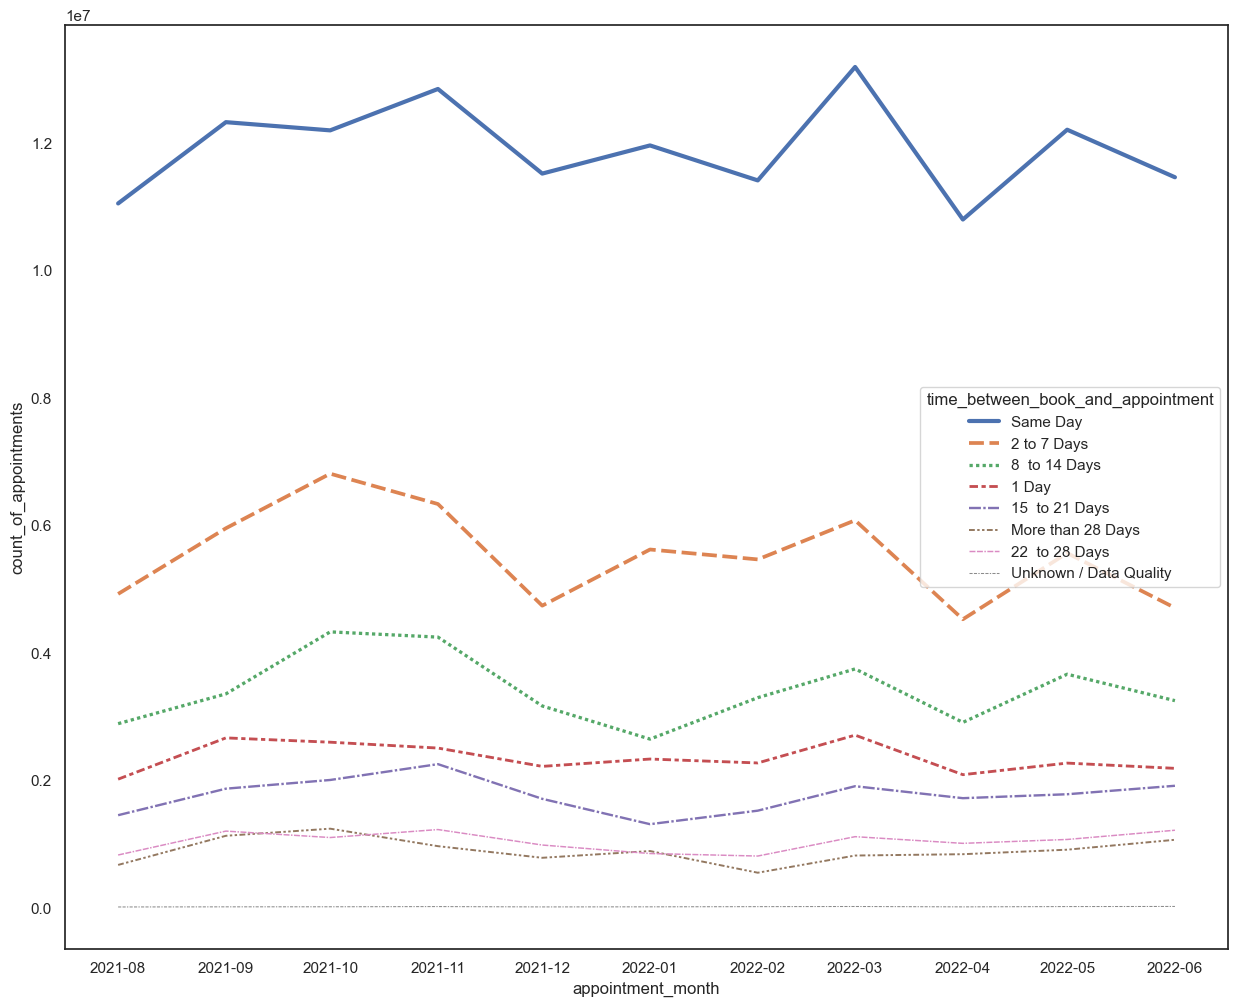

In [110]:
# Create a line plot to answer the question.
tbbna_appts_ar11_monthly = appt_reg_11.groupby(['appointment_month','time_between_book_and_appointment'])\
                                               [['count_of_appointments']].\
                                               sum().reset_index()
tbbna_appts_ar11_monthly = tbbna_appts_ar11_monthly.sort_values('count_of_appointments', ascending=False)

tbbna_appts = sns.lineplot(data=tbbna_appts_ar11_monthly,
                           x='appointment_month',
                           y='count_of_appointments',
                           hue='time_between_book_and_appointment',
                           size='time_between_book_and_appointment',
                           style='time_between_book_and_appointment')

**Question 6:** How do the various service settings compare?

In [112]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc.head()
nc.info()
nc.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(5), period[M](1)
memory usage: 49.9+ MB


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
count,817394,817394,817394,817394,817394,817394,817394.000000,817394
unique,NaN,42,106,5,3,18,NaN,11
top,NaN,E54000057,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Inconsistent Mapping,NaN,2022-03
freq,NaN,59180,13007,359274,700481,89494,NaN,82822
mean,2022-01-16 00:50:35.860796160,NaN,NaN,NaN,NaN,NaN,362.183684,NaN
min,2021-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,2021-10-25 00:00:00,NaN,NaN,NaN,NaN,NaN,7.000000,NaN
50%,2022-01-18 00:00:00,NaN,NaN,NaN,NaN,NaN,25.000000,NaN
75%,2022-04-07 00:00:00,NaN,NaN,NaN,NaN,NaN,128.000000,NaN
max,2022-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,16590.000000,NaN


In [113]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
total_appts_nc_monthly = nc.groupby('appointment_month')[['count_of_appointments']].sum().reset_index()

# View the DataFrame.
total_appts_nc_monthly

,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776
5,2022-01,25635474
6,2022-02,25355260
7,2022-03,29595038
8,2022-04,23913060
9,2022-05,27495508


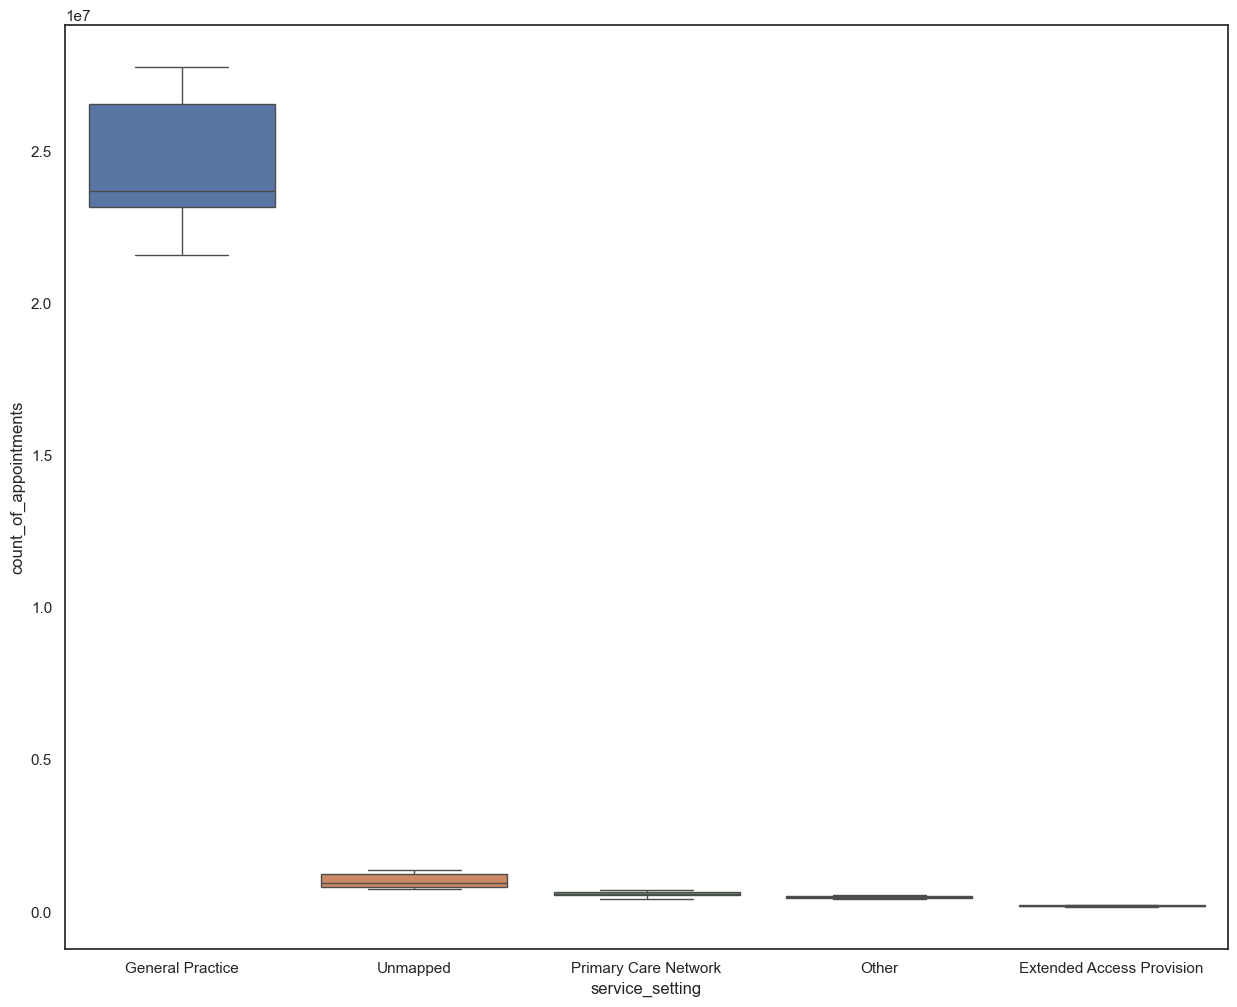

In [114]:
# Create a boxplot in Seaborn based on the new DataFrame to indicate the service settings for the number of appointments.
ss_appts_nc_monthly = nc.groupby(['appointment_month','service_setting'])[['count_of_appointments']].sum().reset_index()
ss_appts_nc_monthly = ss_appts_nc_monthly.sort_values('count_of_appointments', ascending=False)
ss_appts_nc_daily = nc.groupby(['appointment_date','service_setting'])[['count_of_appointments']].sum().reset_index()
ss_appts_nc_daily = ss_appts_nc_daily.sort_values('count_of_appointments', ascending=False)
ss_appts = sns.boxplot(data=ss_appts_nc_monthly,
                       x='service_setting',
                       y='count_of_appointments',
                       hue='service_setting')

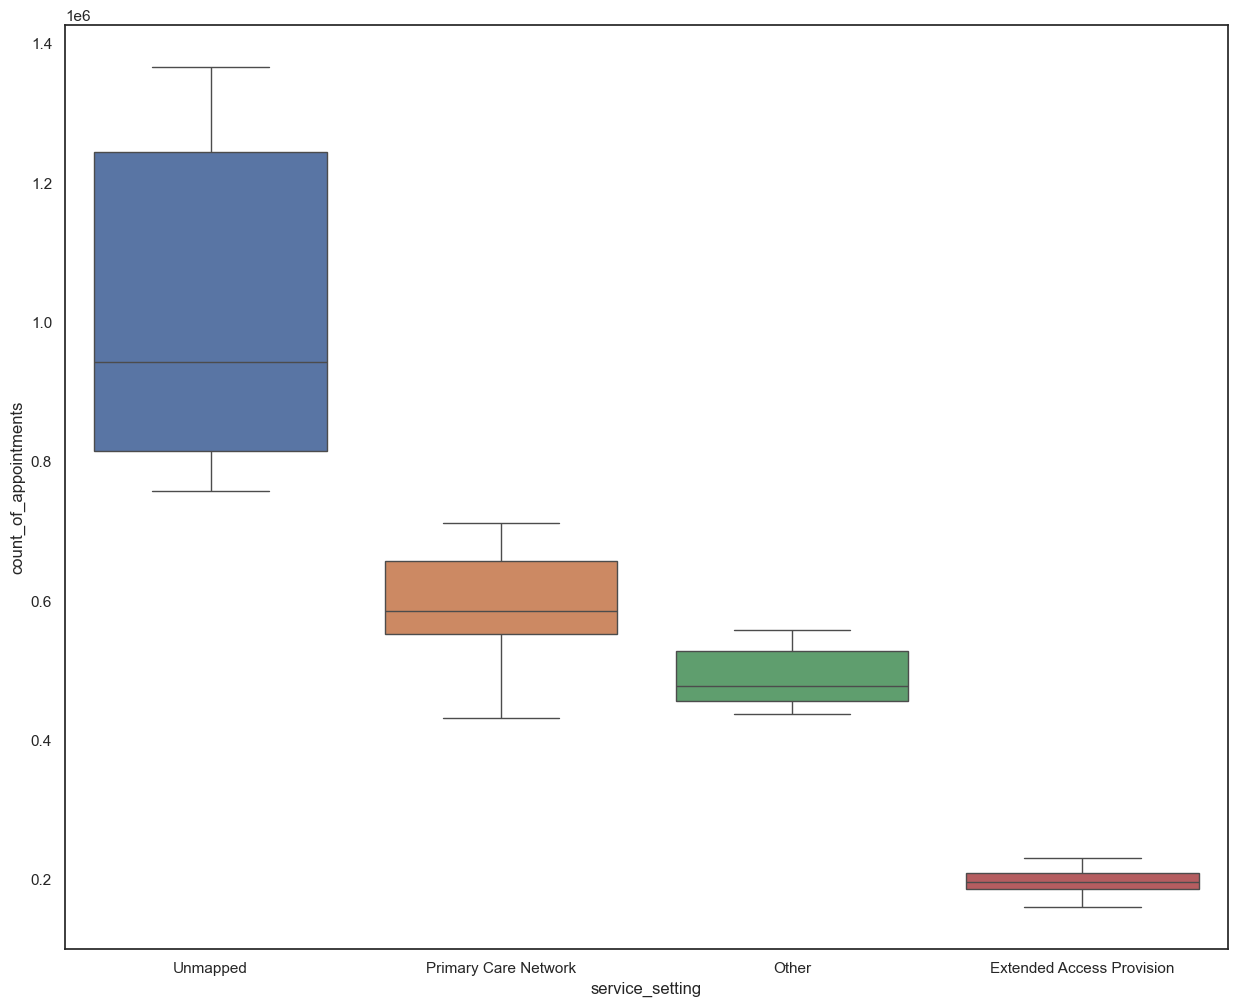

In [115]:
# Create a boxplot in Seaborn where you concentrate on all the service settings, excluding GP visits.
ss_appts_nc_monthly_nonGP = ss_appts_nc_monthly.loc[ss_appts_nc_monthly['service_setting']!='General Practice']
ss_appts_nc_monthly_nonGP = ss_appts_nc_monthly_nonGP.sort_values('count_of_appointments', ascending=False)

ss_appts_nonGP = sns.boxplot(data=ss_appts_nc_monthly_nonGP,
                             x='service_setting',
                             y='count_of_appointments',
                             hue='service_setting')

# 

### Provide a summary of your findings and recommendations based on the analysis.

> Double click to insert your summary.

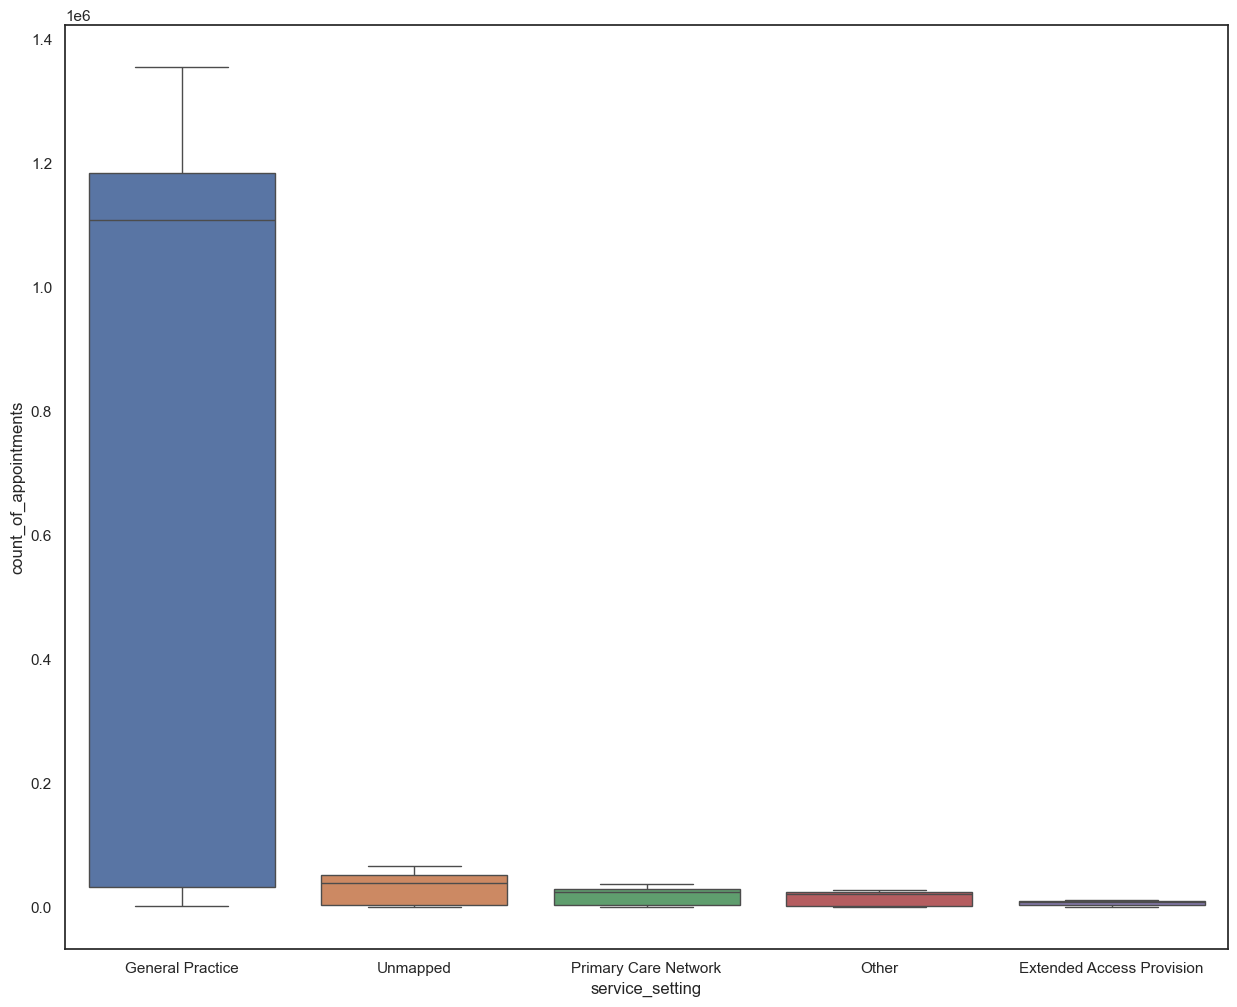

In [119]:
ss_appts_nc_daily = nc.groupby(['appointment_date','service_setting'])[['count_of_appointments']].sum().reset_index()
ss_appts_nc_daily = ss_appts_nc_daily.sort_values('count_of_appointments', ascending=False)

ss_appts_nc_day = sns.boxplot(data=ss_appts_nc_daily,
                       x='service_setting',
                       y='count_of_appointments',
                       hue='service_setting')

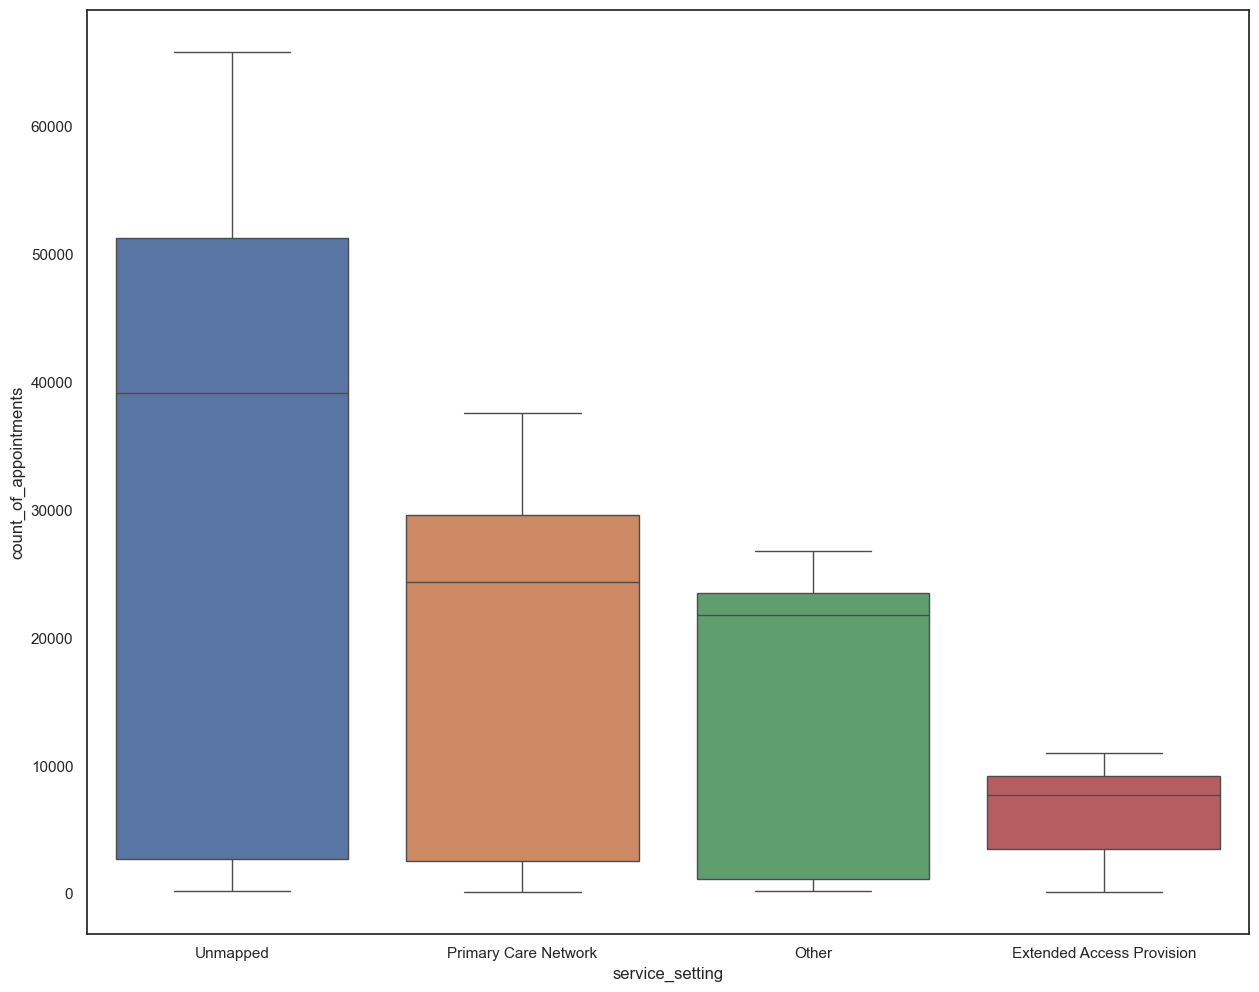

In [120]:
ss_appts_nc_daily_nonGP = ss_appts_nc_daily.loc[ss_appts_nc_daily['service_setting']!='General Practice']
ss_appts_nc_daily_nonGP = ss_appts_nc_daily_nonGP.sort_values('count_of_appointments', ascending=False)

ss_appts_nonGP_day = sns.boxplot(data=ss_appts_nc_daily_nonGP,
                             x='service_setting',
                             y='count_of_appointments',
                             hue='service_setting')

In [121]:
total_appts_nc_daily = nc.groupby('appointment_date')[['count_of_appointments']].sum().reset_index()

# View the DataFrame.
total_appts_nc_daily.describe(include='all')

,appointment_date,count_of_appointments
count,334,3.340000e+02
mean,2022-01-14 12:00:00,8.863676e+05
min,2021-08-01 00:00:00,3.693000e+03
25%,2021-10-23 06:00:00,4.010275e+04
50%,2022-01-14 12:00:00,1.208260e+06
75%,2022-04-07 18:00:00,1.292652e+06
max,2022-06-30 00:00:00,1.480215e+06
std,NaN,5.679458e+05


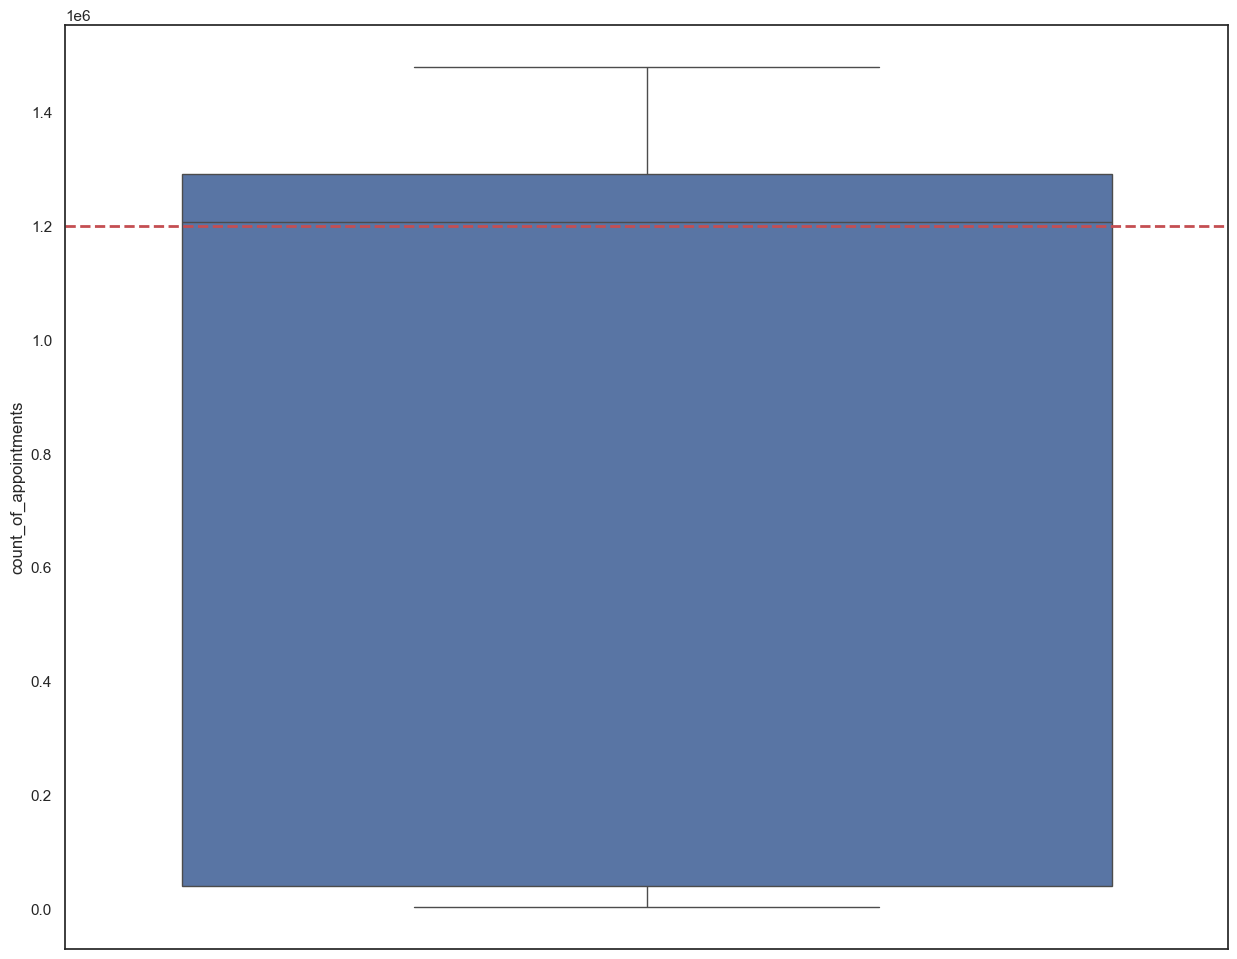

In [122]:
total_appts_nc_day = sns.boxplot(data=total_appts_nc_daily,
                                 y='count_of_appointments')
total_appts_nc_day.axhline(1200000, ls='--', lw=2, c='r')

In [123]:
# Calculating Daily Pattern

max_capacity = 1200000

# Add a new column to indicate the average utilisation of services.
total_appts_nc_daily['util_rate'] = round(((total_appts_nc_daily['count_of_appointments'])/max_capacity)*100, 1)

total_appts_nc_daily = total_appts_nc_daily.sort_values('util_rate', ascending=False)

# View the DataFrame.
total_appts_nc_daily.info()
total_appts_nc_daily.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 106 to 147
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   appointment_date       334 non-null    datetime64[ns]
 1   count_of_appointments  334 non-null    int64         
 2   util_rate              334 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 10.4 KB


,appointment_date,count_of_appointments,util_rate
count,334,3.340000e+02,334.000000
mean,2022-01-14 12:00:00,8.863676e+05,73.865569
min,2021-08-01 00:00:00,3.693000e+03,0.300000
25%,2021-10-23 06:00:00,4.010275e+04,3.325000
50%,2022-01-14 12:00:00,1.208260e+06,100.700000
75%,2022-04-07 18:00:00,1.292652e+06,107.750000
max,2022-06-30 00:00:00,1.480215e+06,123.400000
std,NaN,5.679458e+05,47.327655


[Text(0, 0, '35%'), Text(0, 0, '65%')]

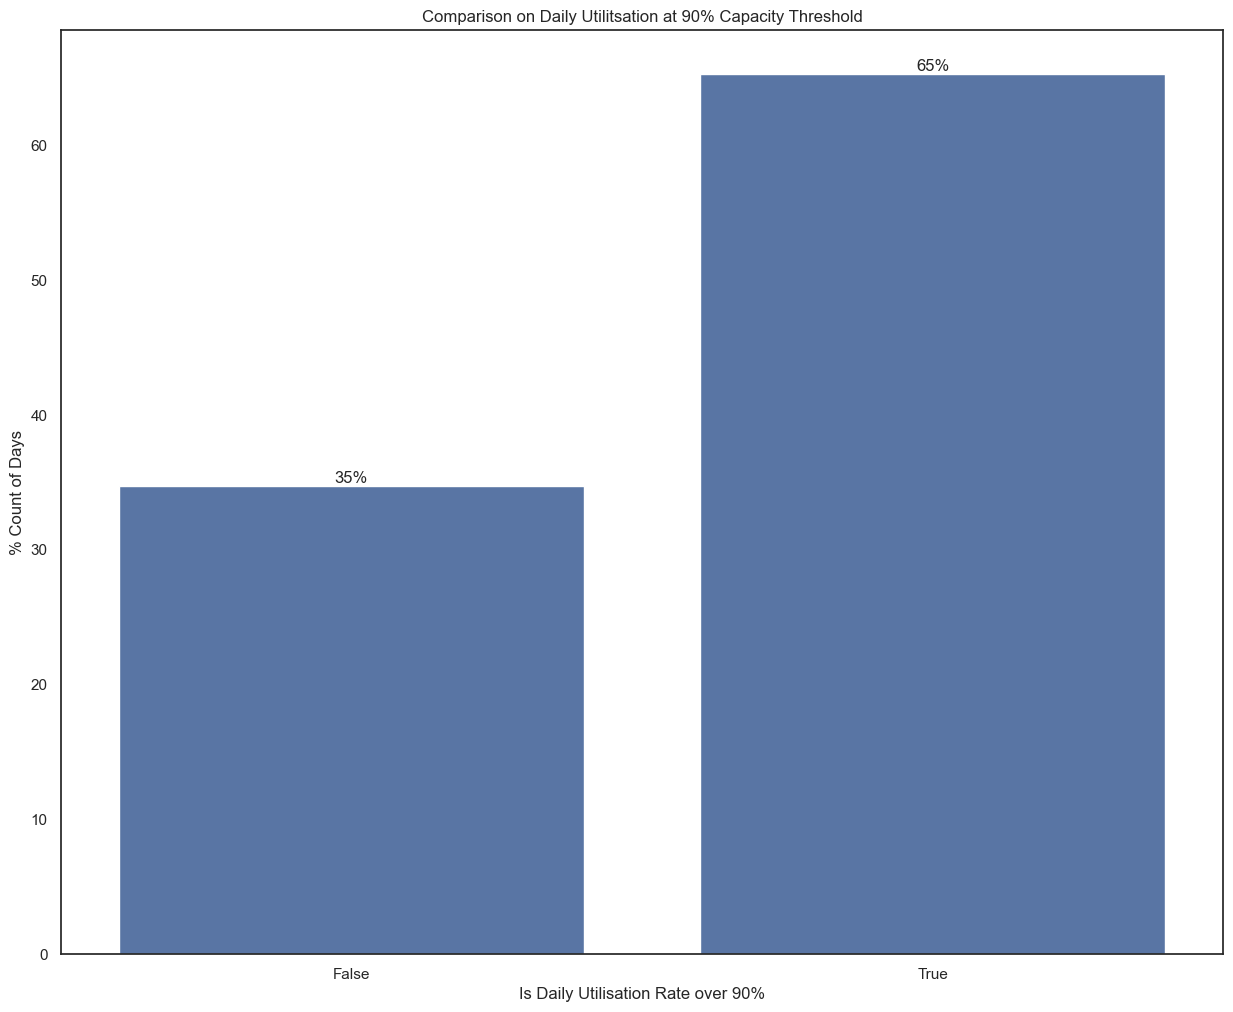

In [124]:
util_appts_nc_day = sns.countplot(data=total_appts_nc_daily,
                                 x=total_appts_nc_daily['util_rate']>90,
                                 stat='percent')
# util_appts_nc_day.set(ylim=(40, 60))
util_appts_nc_day.set_xlabel('Is Daily Utilisation Rate over 90%')
util_appts_nc_day.set_ylabel('% Count of Days')
util_appts_nc_day.set_title('Comparison on Daily Utilitsation at 90% Capacity Threshold')
util_appts_nc_day.bar_label(util_appts_nc_day.containers[0],fmt='%.f%%')

In [125]:
total_appts_nc_daily['day'] = total_appts_nc_daily['appointment_date'].dt.day_name()
total_appts_nc_daily.head()

,appointment_date,count_of_appointments,util_rate,day
106,2021-11-15,1480215,123.4,Monday
71,2021-10-11,1480165,123.3,Monday
99,2021-11-08,1477922,123.2,Monday
78,2021-10-18,1465917,122.2,Monday
113,2021-11-22,1455862,121.3,Monday


Text(Saturday, 1090800.0, 'Daily Capacity Threshold@90%')

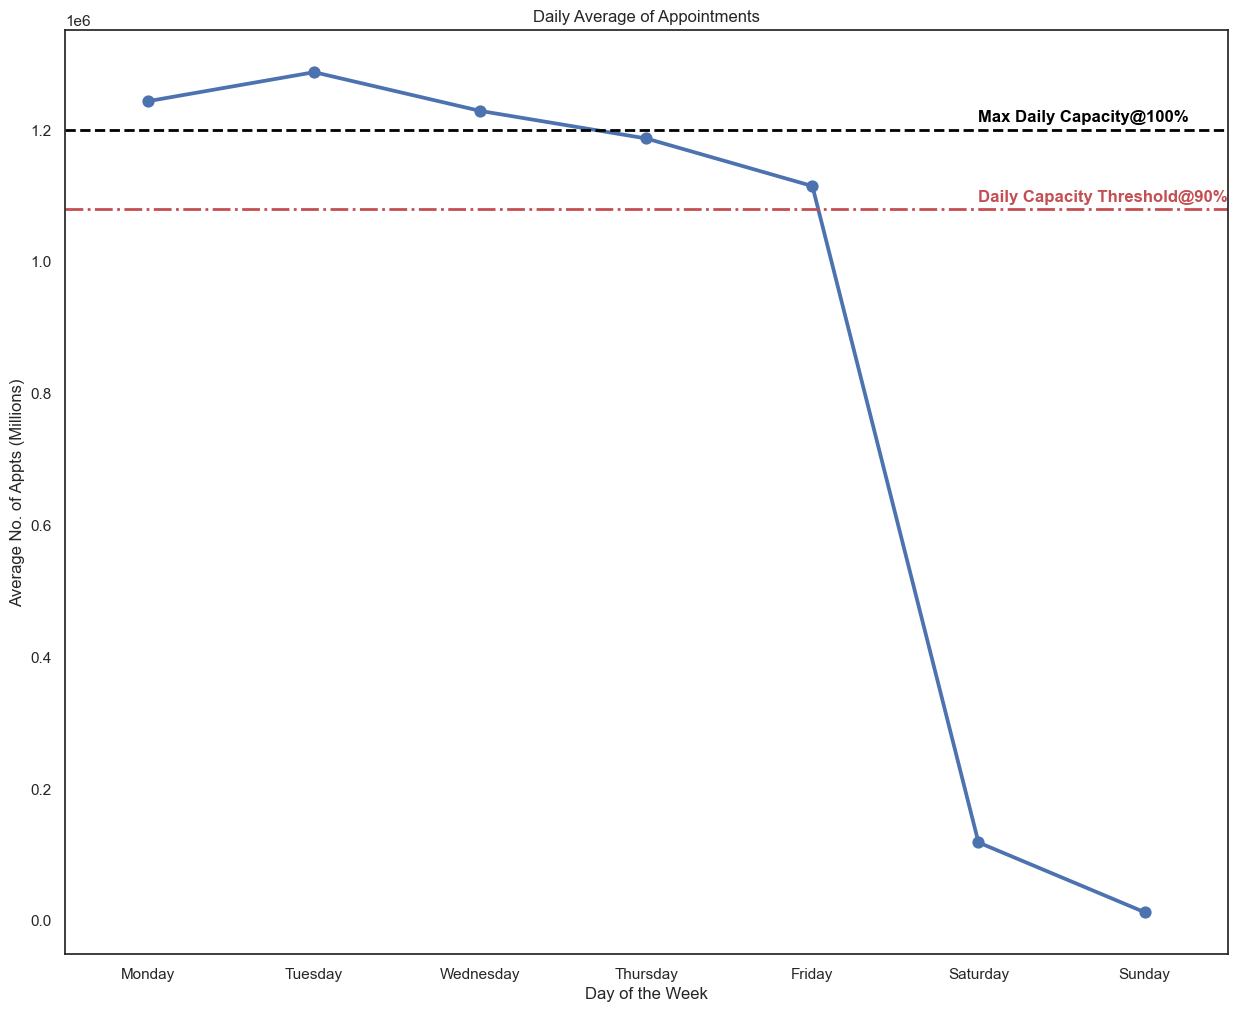

In [126]:
cnt_appts_day = sns.pointplot(data=total_appts_nc_daily,
                             x='day',
                             y='count_of_appointments',
                             estimator='mean',
                             errorbar=None)
cnt_appts_day.axhline(max_capacity, ls='--', lw=2, c='#000000')
cnt_appts_day.axhline(0.9*max_capacity, ls='-.', lw=2, c='r')
cnt_appts_day.set_xlabel('Day of the Week')
cnt_appts_day.set_ylabel('Average No. of Appts (Millions)')
cnt_appts_day.set_title('Daily Average of Appointments')
cnt_appts_day.text('Saturday', max_capacity*1.01, 'Max Daily Capacity@100%', color='#000000', weight='bold')
cnt_appts_day.text('Saturday', 0.9*max_capacity*1.01, 'Daily Capacity Threshold@90%', color='r', weight='bold')

In [244]:
# Calculating Proportion of Did Not Attend Appointment Status over Months for ICBs

# Filter monthly appointment data from ar from June 2021 to May 2022 both inclusive.
    # Removes effect of COVID-19 Pandemic where normalcy returned from March 2021.
    # Data extracted for one full Year including all seasons
ar_12 = ar.loc[(ar['appointment_month']>='2021-06') & \
               (ar['appointment_month']<='2022-05')]\
               .reset_index(drop=True)
ar_12 = ar_12.astype({'appointment_month':'datetime64[ns]'})

# Validate the Dataframe
# ar_12.info()
# ar_12.describe(include='all')
print('\n',ar_12['count_of_appointments'].sum(),'\n')


 322742093 



In [128]:
ar_12.info()
ar_12.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242900 entries, 0 to 242899
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   icb_ons_code                       242900 non-null  object        
 1   appointment_month                  242900 non-null  datetime64[ns]
 2   appointment_status                 242900 non-null  object        
 3   hcp_type                           242900 non-null  object        
 4   appointment_mode                   242900 non-null  object        
 5   time_between_book_and_appointment  242900 non-null  object        
 6   count_of_appointments              242900 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 13.0+ MB


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2021-06-01,Attended,GP,Face-to-Face,1 Day,7226
1,E54000034,2021-06-01,Attended,GP,Face-to-Face,15 to 21 Days,2751
2,E54000034,2021-06-01,Attended,GP,Face-to-Face,2 to 7 Days,12526
3,E54000034,2021-06-01,Attended,GP,Face-to-Face,22 to 28 Days,983
4,E54000034,2021-06-01,Attended,GP,Face-to-Face,8 to 14 Days,6474


In [129]:
ar_12.tail()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
242895,E54000050,2022-05-01,Unknown,Unknown,Unknown,2 to 7 Days,17
242896,E54000050,2022-05-01,Unknown,Unknown,Unknown,22 to 28 Days,5
242897,E54000050,2022-05-01,Unknown,Unknown,Unknown,8 to 14 Days,14
242898,E54000050,2022-05-01,Unknown,Unknown,Unknown,More than 28 Days,11
242899,E54000050,2022-05-01,Unknown,Unknown,Unknown,Same Day,12


In [130]:
# Aggregate the appointments as per status for each month
status_appts_ar_12 = ar_12.groupby(['appointment_month', 'appointment_status'])\
             [['count_of_appointments']].sum().reset_index()

# Pivot the aggregate data to wide form for plotting
status_appts_ar_12_pivot = status_appts_ar_12.pivot(
                           index = 'appointment_month',
                           columns = 'appointment_status',
                           values = 'count_of_appointments')
status_appts_ar_12_pivot.index = status_appts_ar_12_pivot.index.strftime('%Y-%m')

# Calculation of Pecentages for each columns as _p
status_appts_ar_12_pivot['Total'] = status_appts_ar_12_pivot['Attended'] +\
                                    status_appts_ar_12_pivot['DNA'] +\
                                    status_appts_ar_12_pivot['Unknown']

status_appts_ar_12_pivot['Attended_p'] = round((status_appts_ar_12_pivot['Attended']\
                                                /status_appts_ar_12_pivot['Total'])\
                                                *100,2)
status_appts_ar_12_pivot['DNA_p'] = round((status_appts_ar_12_pivot['DNA']\
                                           /status_appts_ar_12_pivot['Total'])\
                                           *100,2)
status_appts_ar_12_pivot['Unknown_p'] = round((status_appts_ar_12_pivot['Unknown']\
                                               /status_appts_ar_12_pivot['Total'])\
                                               *100,2)

# View Dataframe
status_appts_ar_12_pivot.index

Index(['2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11',
       '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05'],
      dtype='object', name='appointment_month')

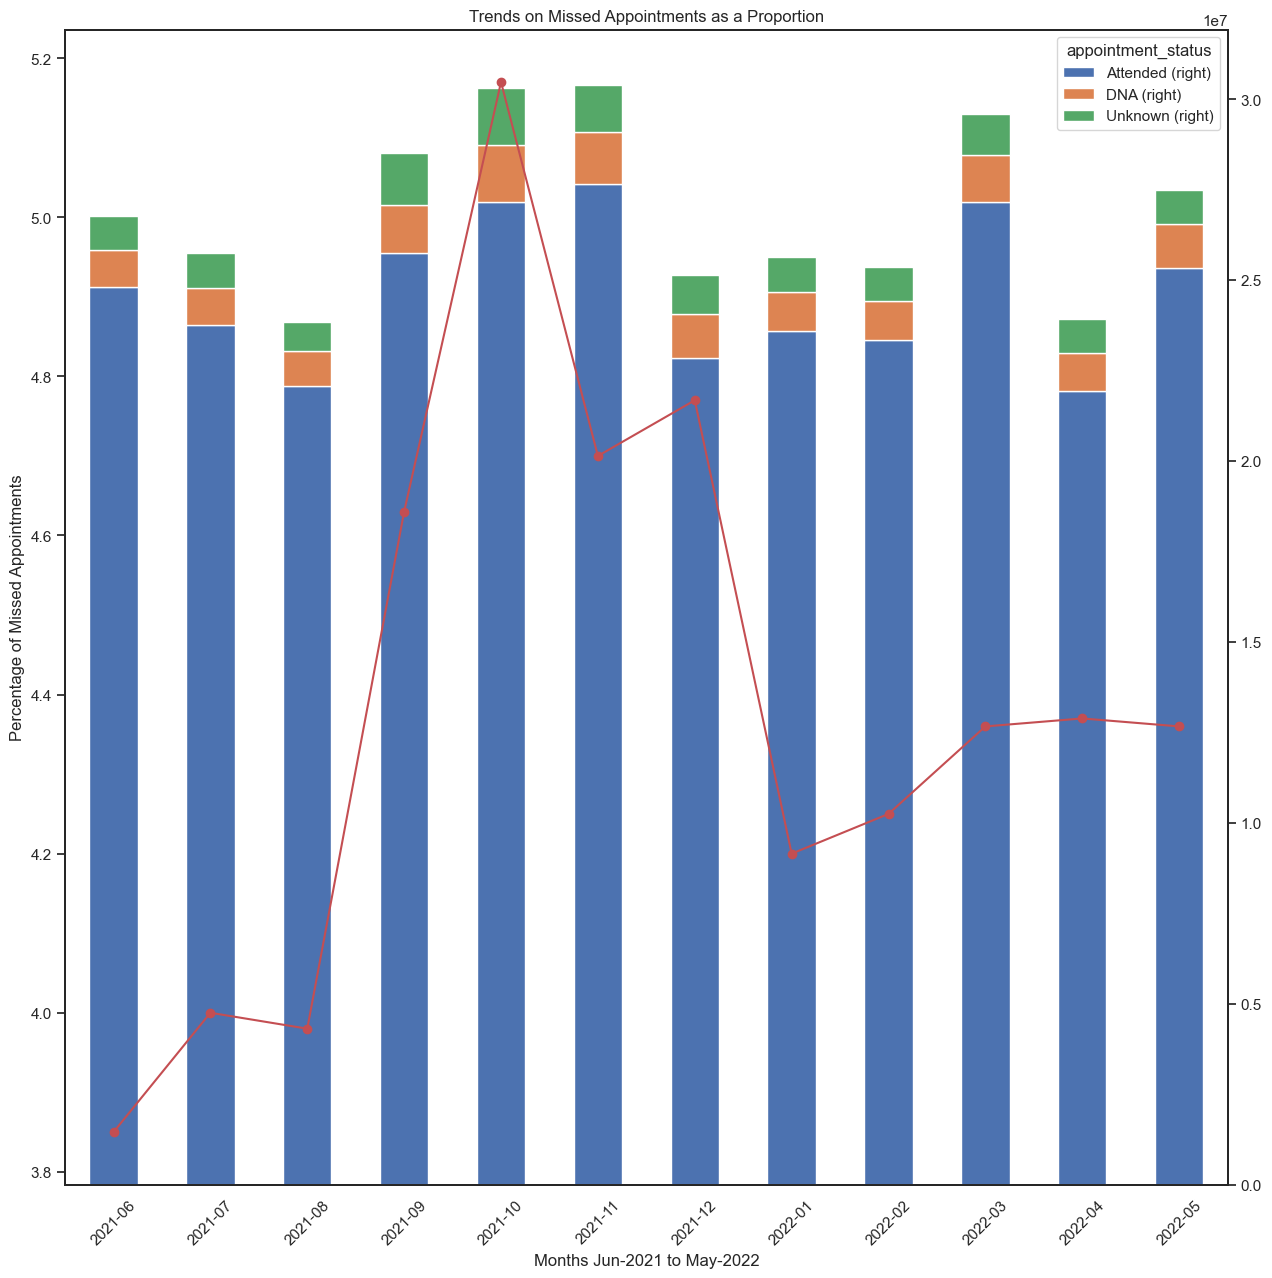

In [131]:
# List of selective Columns to reuse in the plots
status_pct = ['Attended_p', 'DNA_p', 'Unknown_p']
status_abs = ['Attended', 'DNA', 'Unknown']

fig1, ax1 = plt.subplots(figsize = (15, 15))

# Plot the stacked bar chart on the right y-axis
status_appts_ar_12_pivot[status_abs].plot(kind='bar', stacked=True, ax=ax1, secondary_y=True)
ax1.set_xlabel('Months Jun-2021 to May-2022')
ax1.set_ylabel('Percentage of Appointments')
ax1.tick_params(axis='x', labelrotation=45)
ax1.yaxis.set_label_position('right')

# Create a secondary y-axis on the left for the trend line
ax2 = ax1.twinx()

ax2.plot(status_appts_ar_12_pivot.index,
         status_appts_ar_12_pivot['DNA_p'],
         color='r',
         marker='o')
ax2.set_ylabel('Percentage of Missed Appointments')
ax2.yaxis.set_label_position('left')
ax2.yaxis.tick_left()

plt.title('Trends on Missed Appointments as a Proportion')
plt.show()

In [132]:
# Aggregate the appointments as per Time Between Booking and Appointment for each month
tbbna_appts_ar_12 = ar_12.groupby(['appointment_month',
                                    'time_between_book_and_appointment'])\
                                    [['count_of_appointments']].sum().reset_index()
tbbna_appts_ar_12 = tbbna_appts_ar_12.sort_values('count_of_appointments', ascending=False)
# tbbna_appts_ar_12['appointment_month'] = tbbna_appts_ar_12['appointment_month'].dt.strftime('%Y-%m')

tbbna_appts_ar_12.info()
tbbna_appts_ar_12.head()
tbbna_appts_ar_12['time_between_book_and_appointment'].value_counts().index

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 78 to 23
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   appointment_month                  96 non-null     datetime64[ns]
 1   time_between_book_and_appointment  96 non-null     object        
 2   count_of_appointments              96 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.0+ KB


Index(['Same Day', '2 to 7 Days', '8  to 14 Days', '1 Day', '15  to 21 Days',
       'More than 28 Days', '22  to 28 Days', 'Unknown / Data Quality'],
      dtype='object', name='time_between_book_and_appointment')

Text(0.5, 0, 'Time Between Booked and Appointment')

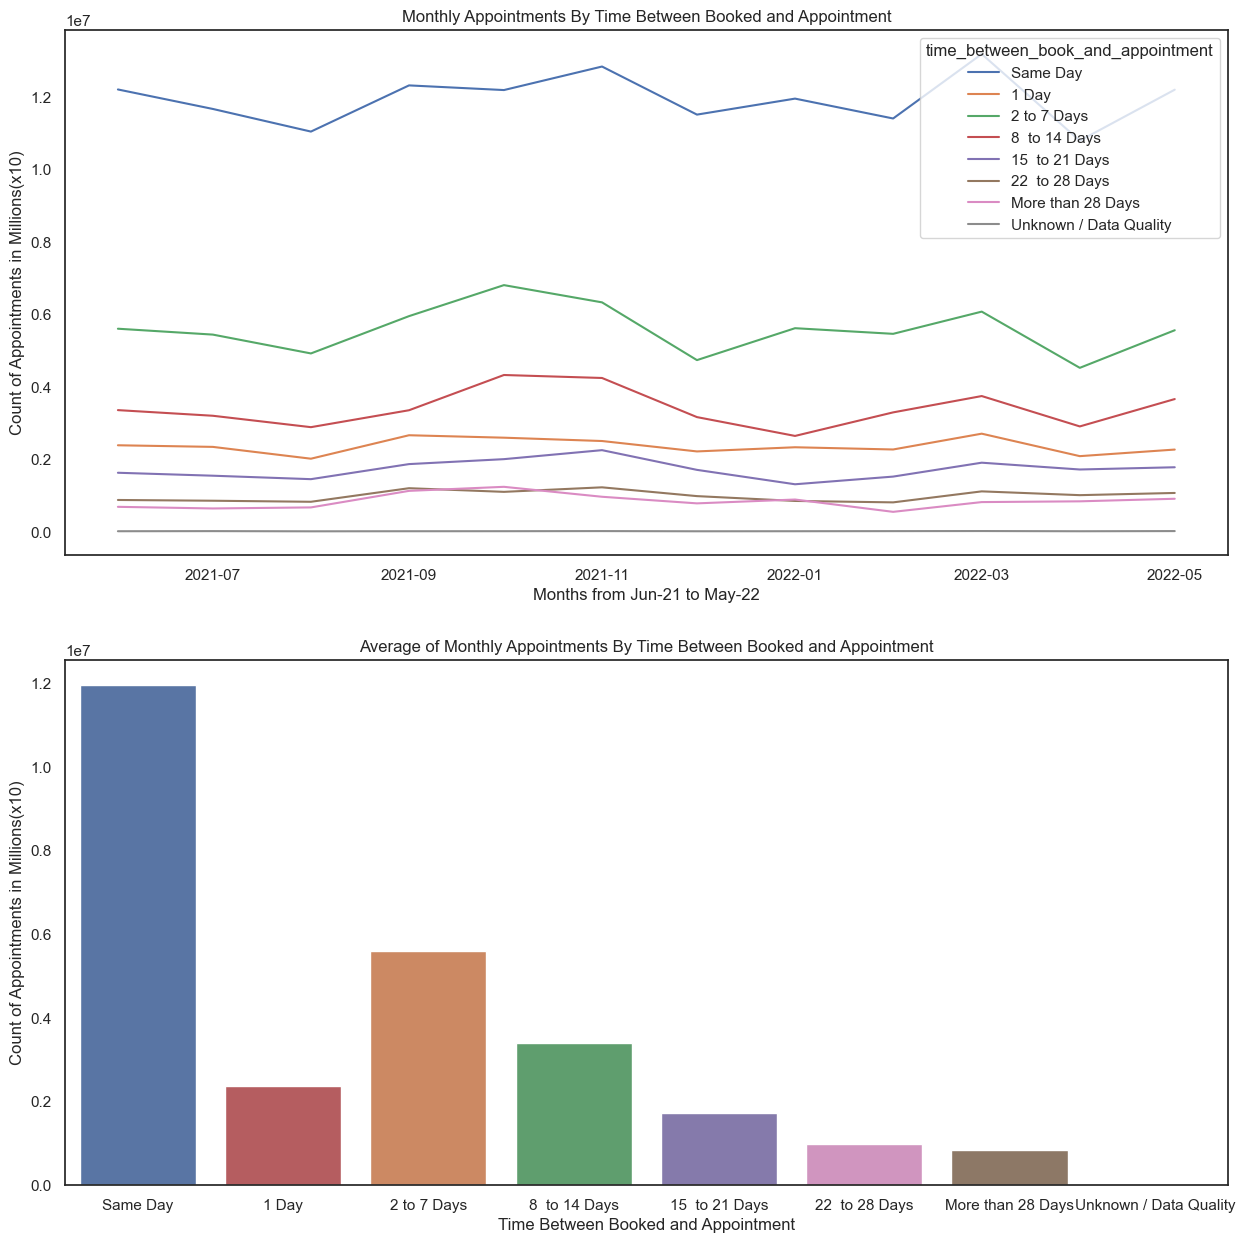

In [133]:
# Create plots for Time Between Booking and Appointment

fig2, (ax3, ax4) = plt.subplots(2,1, figsize = (15, 15))

# Line plot for a Total of Count of Appointments from June 2021 to May 2022
"""
tbbna_lp1 = sns.lineplot(data=tbbna_appts_ar_12,
                         x='appointment_month',
                         y='count_of_appointments',
                         estimator='sum',
                         errorbar=None,
                         ax=ax3)
tbbna_lp1.set_ylabel('Total Count of Appointments in Millions(x10)')
tbbna_lp1.set_xlabel('Monthly from Jun-21 to May-22')
"""

# Line plot for a Total of Count of Appointments by Time Between Book and Appointment from June 2021 to May 2022
tbbna_lp2 = sns.lineplot(data=tbbna_appts_ar_12,
                         x='appointment_month',
                         y='count_of_appointments',
                         estimator='sum',
                         hue='time_between_book_and_appointment',
                         hue_order=['Same Day', '1 Day', '2 to 7 Days', '8  to 14 Days', '15  to 21 Days', '22  to 28 Days', 'More than 28 Days', 'Unknown / Data Quality'],
                         errorbar=None,
                         ax=ax3)
tbbna_lp2.set_title('Monthly Appointments By Time Between Booked and Appointment')
tbbna_lp2.set_ylabel('Count of Appointments in Millions(x10)')
tbbna_lp2.set_xlabel('Months from Jun-21 to May-22')

# Bar plot for a Monthly Average of Count of Appointments by Time Between Book and Appointment
tbbna_brp1 = sns.barplot(data=tbbna_appts_ar_12,
                         x='time_between_book_and_appointment',
                         y='count_of_appointments',
                         estimator='mean',
                         hue='time_between_book_and_appointment',
                         order=['Same Day', '1 Day', '2 to 7 Days', '8  to 14 Days', '15  to 21 Days', '22  to 28 Days', 'More than 28 Days', 'Unknown / Data Quality'],
                         errorbar=None,
                         ax=ax4)
tbbna_brp1.set_title('Average of Monthly Appointments By Time Between Booked and Appointment')
tbbna_brp1.set_ylabel('Count of Appointments in Millions(x10)')
tbbna_brp1.set_xlabel('Time Between Booked and Appointment')


In [134]:
# Aggregate the appointments as per HCP Type for each month
hcp_appts_ar_12 = ar_12.groupby(['appointment_month',
                                 'hcp_type'])\
                                [['count_of_appointments']].sum().reset_index()
hcp_appts_ar_12 = hcp_appts_ar_12.sort_values('count_of_appointments', ascending=False)
hcp_appts_ar_12.info()
print('\n', hcp_appts_ar_12.head(),'\n')

# Aggregate the appoinments as per Appointment Mode for each month
mode_appts_ar_12 = ar_12.groupby(['appointment_month',
                                 'appointment_mode'])\
                                [['count_of_appointments']].sum().reset_index()
mode_appts_ar_12 = mode_appts_ar_12.sort_values('count_of_appointments', ascending=False)
mode_appts_ar_12.info()
print('\n', mode_appts_ar_12.head())

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 27 to 8
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   appointment_month      36 non-null     datetime64[ns]
 1   hcp_type               36 non-null     object        
 2   count_of_appointments  36 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.1+ KB

    appointment_month              hcp_type  count_of_appointments
27        2022-03-01                    GP               15127227
13        2021-10-01  Other Practice staff               14942504
15        2021-11-01                    GP               14897749
9         2021-09-01                    GP               14487785
16        2021-11-01  Other Practice staff               14432800 

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 20 to 14
Data columns (total 3 columns):
 #   Column                 Non-Null Coun

Text(0.5, 0, 'Appoinment Mode')

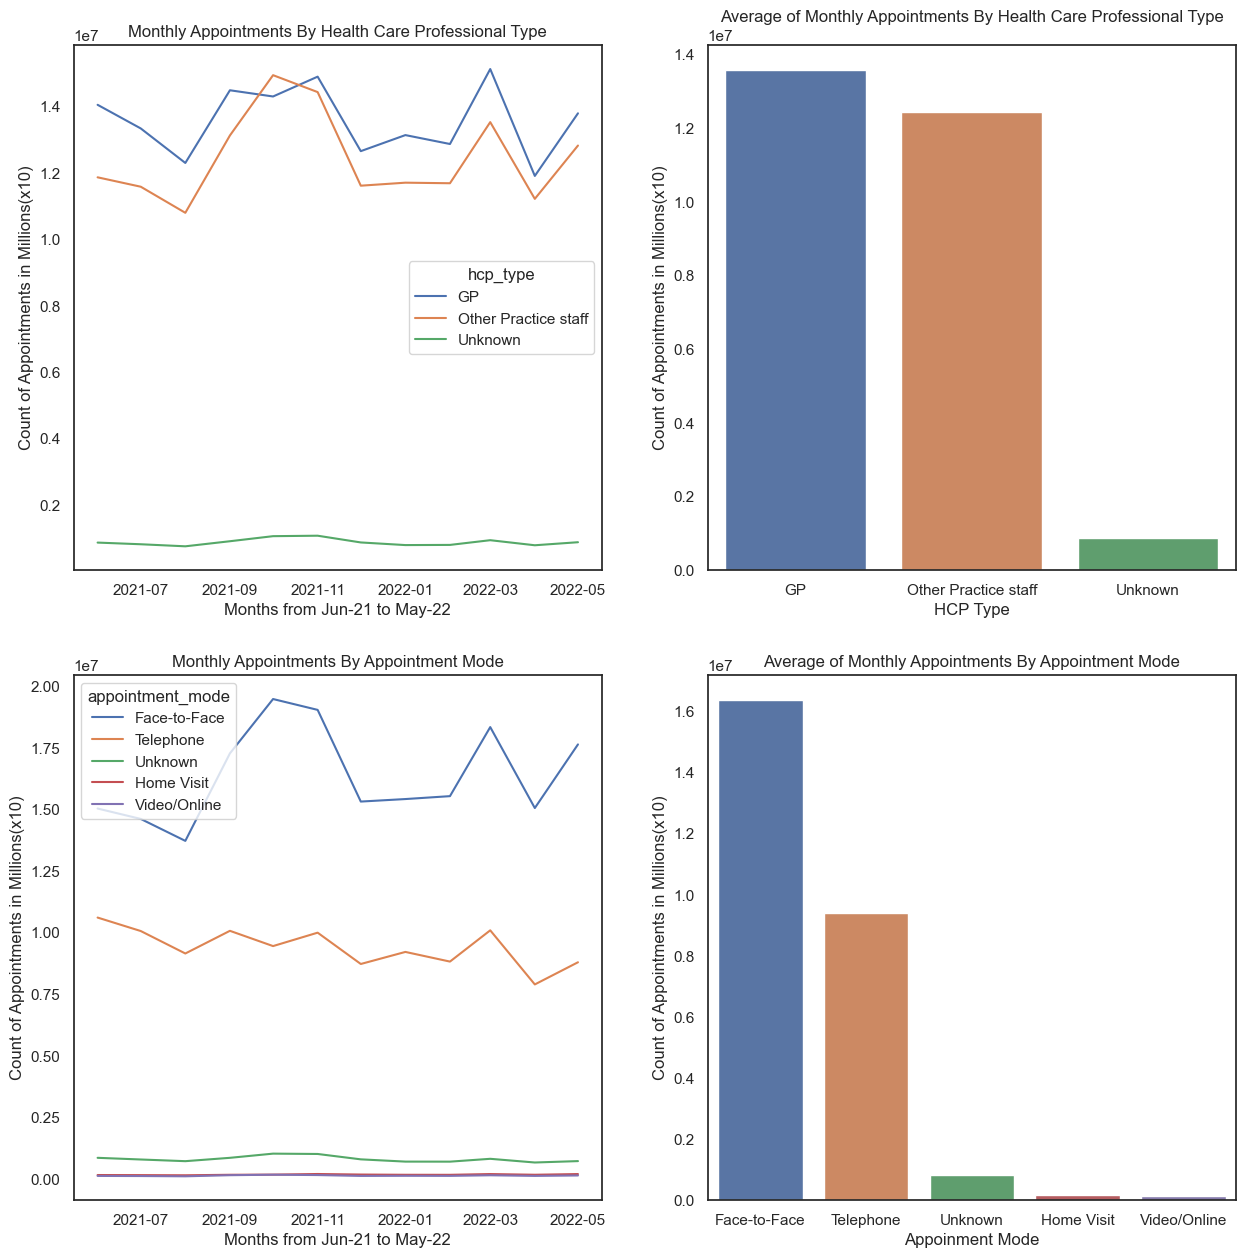

In [135]:
# Create plots for HCP Type and Appointment Mode

fig3, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2, figsize = (15, 15))

# Line plot for a Total of Count of Appointments by HCP Type from June 2021 to May 2022
hcp_lp1 = sns.lineplot(data=hcp_appts_ar_12,
                       x='appointment_month',
                       y='count_of_appointments',
                       estimator='sum',
                       hue='hcp_type',
                       errorbar=None,
                       ax=ax5)
hcp_lp1.set_title('Monthly Appointments By Health Care Professional Type')
hcp_lp1.set_ylabel('Count of Appointments in Millions(x10)')
hcp_lp1.set_xlabel('Months from Jun-21 to May-22')

# Bar plot for a Monthly Average of Count of Appointments by HCP Type
hcp_brp1 = sns.barplot(data=hcp_appts_ar_12,
                       x='hcp_type',
                       y='count_of_appointments',
                       estimator='mean',
                       hue='hcp_type',
                       errorbar=None,
                       ax=ax6)
hcp_brp1.set_title('Average of Monthly Appointments By Health Care Professional Type')
hcp_brp1.set_ylabel('Count of Appointments in Millions(x10)')
hcp_brp1.set_xlabel('HCP Type')

# Line plot for a Total of Count of Appointments by Appointment Mode from June 2021 to May 2022
mode_lp1 = sns.lineplot(data=mode_appts_ar_12,
                       x='appointment_month',
                       y='count_of_appointments',
                       estimator='sum',
                       hue='appointment_mode',
                       errorbar=None,
                       ax=ax7)
mode_lp1.set_title('Monthly Appointments By Appointment Mode')
mode_lp1.set_ylabel('Count of Appointments in Millions(x10)')
mode_lp1.set_xlabel('Months from Jun-21 to May-22')

# Bar plot for a Monthly Average of Count of Appointments by Appointment Mode
mode_brp1 = sns.barplot(data=mode_appts_ar_12,
                       x='appointment_mode',
                       y='count_of_appointments',
                       estimator='mean',
                       hue='appointment_mode',
                       errorbar=None,
                       ax=ax8)
mode_brp1.set_title('Average of Monthly Appointments By Appointment Mode')
mode_brp1.set_ylabel('Count of Appointments in Millions(x10)')
mode_brp1.set_xlabel('Appoinment Mode')

In [136]:
# Aggregate the appointments as per Context Type for each day and month
ct_appts_nc_monthly = nc.groupby(['appointment_month','context_type'])[['count_of_appointments']].sum().reset_index()
ct_appts_nc_monthly = ct_appts_nc_monthly.sort_values('count_of_appointments', ascending=False)

ct_appts_nc_daily = nc.groupby(['appointment_date','context_type'])[['count_of_appointments']].sum().reset_index()
ct_appts_nc_daily = ct_appts_nc_daily.sort_values('count_of_appointments', ascending=False)

ct_appts_nc_daily.head()
ct_appts_nc_monthly.head()

# Exclude the Unmapped data entries from the aggregate for Context Type
ct_appts_nc_daily_mapped = ct_appts_nc_daily.loc[ct_appts_nc_daily['context_type'] != 'Unmapped']
ct_appts_nc_daily_mapped = ct_appts_nc_daily_mapped.sort_values('count_of_appointments', ascending=False)

ct_appts_nc_monthly_mapped = ct_appts_nc_monthly.loc[ct_appts_nc_monthly['context_type'] != 'Unmapped']
ct_appts_nc_monthly_mapped = ct_appts_nc_monthly_mapped.sort_values('count_of_appointments', ascending=False)

# Exclude the Unmapped data entries from the aggregate for Service Setting
ss_appts_nc_daily_mapped = ss_appts_nc_daily.loc[ss_appts_nc_daily['service_setting'] != 'Unmapped']
ss_appts_nc_daily_mapped = ss_appts_nc_daily_mapped.sort_values('count_of_appointments', ascending=False)

ss_appts_nc_monthly_mapped = ss_appts_nc_monthly.loc[ss_appts_nc_monthly['service_setting'] != 'Unmapped']
ss_appts_nc_monthly_mapped = ss_appts_nc_monthly_mapped.sort_values('count_of_appointments', ascending=False)

In [137]:
ct_appts_nc_daily_mapped.head()

,appointment_date,context_type,count_of_appointments
318,2021-11-15,Care Related Encounter,1279452
297,2021-11-08,Care Related Encounter,1276802
885,2022-05-23,Care Related Encounter,1272572
864,2022-05-16,Care Related Encounter,1271910
213,2021-10-11,Care Related Encounter,1271753


Text(0.5, 0, 'Service Setting')

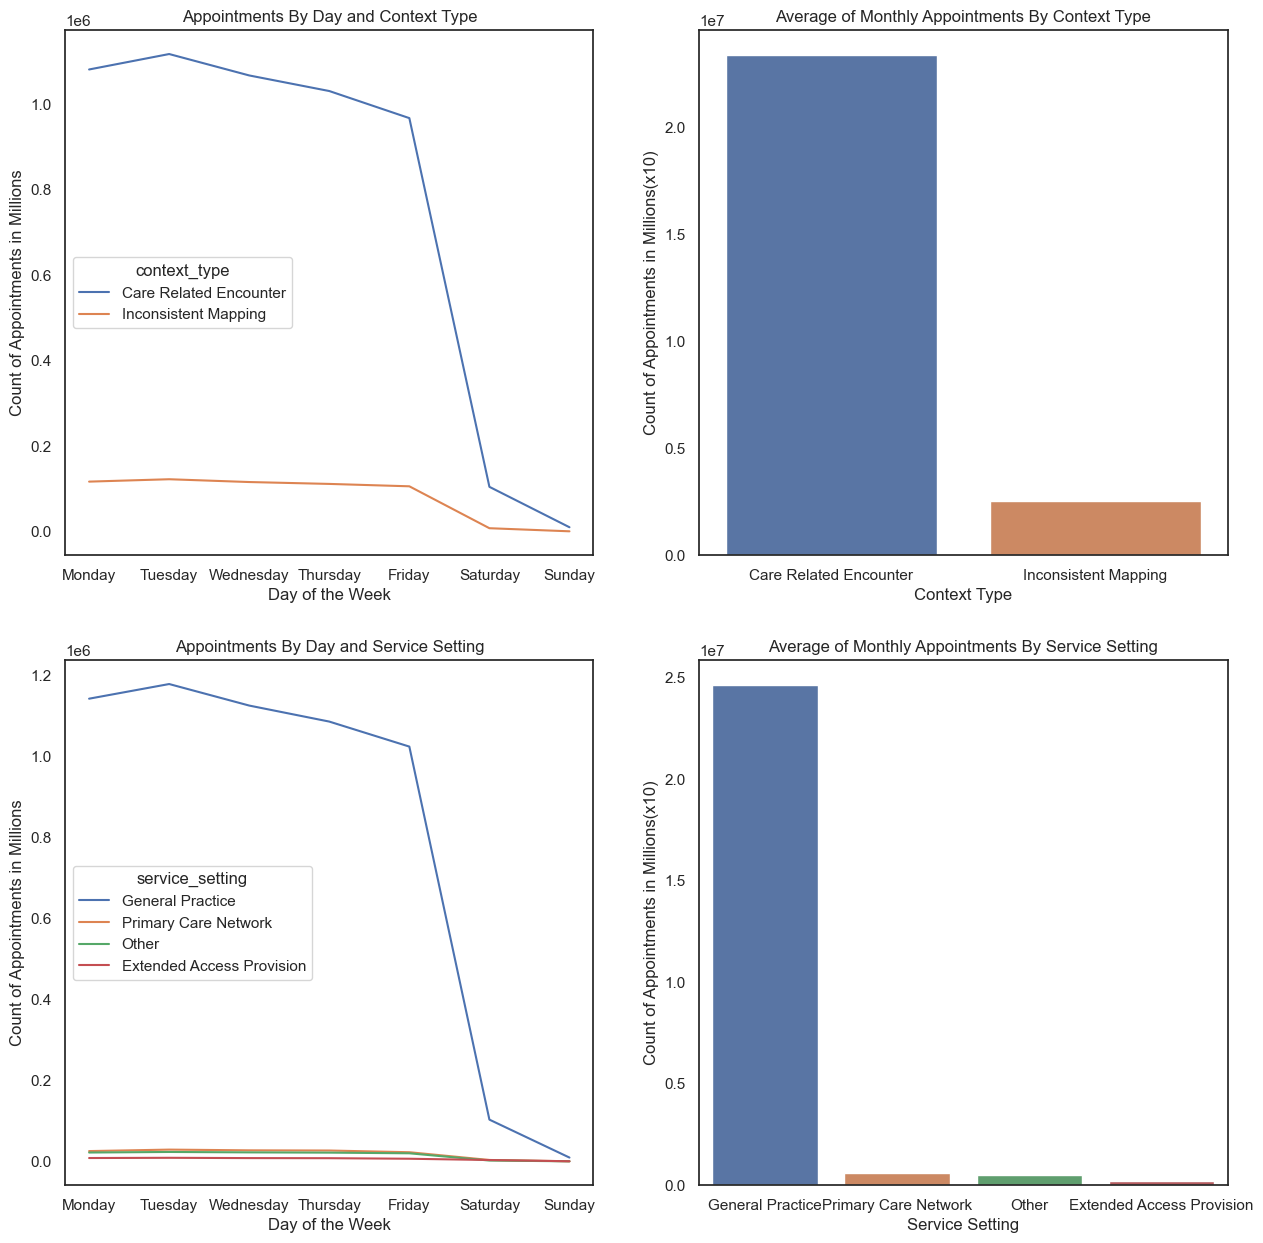

In [138]:
# Create plots for Context Type and Service Setting

fig4, ((ax9, ax10), (ax11, ax12)) = plt.subplots(2, 2, figsize = (15, 15))

# Line plot for an Average of Count of Appointments by Day and Context Type
ct_lp1 = sns.lineplot(data=ct_appts_nc_daily_mapped,
                      x=ct_appts_nc_daily_mapped['appointment_date'].dt.day_name(),
                      y='count_of_appointments',
                      estimator='mean',
                      hue='context_type',
                      errorbar=None,
                      ax=ax9)
ct_lp1.set_title('Appointments By Day and Context Type')
ct_lp1.set_ylabel('Count of Appointments in Millions')
ct_lp1.set_xlabel('Day of the Week')

# Bar plot for a Monthly Average of Count of Appointments by Context Type
ct_brp1 = sns.barplot(data=ct_appts_nc_monthly_mapped,
                      x='context_type',
                      y='count_of_appointments',
                      estimator='mean',
                      hue='context_type',
                      errorbar=None,
                      ax=ax10)
ct_brp1.set_title('Average of Monthly Appointments By Context Type')
ct_brp1.set_ylabel('Count of Appointments in Millions(x10)')
ct_brp1.set_xlabel('Context Type')

# Line plot for an Average of Count of Appointments by Day and Service Setting
ss_lp1 = sns.lineplot(data=ss_appts_nc_daily_mapped,
                      x=ss_appts_nc_daily_mapped['appointment_date'].dt.day_name(),
                      y='count_of_appointments',
                      estimator='mean',
                      hue='service_setting',
                      errorbar=None,
                      ax=ax11)
ss_lp1.set_title('Appointments By Day and Service Setting')
ss_lp1.set_ylabel('Count of Appointments in Millions')
ss_lp1.set_xlabel('Day of the Week')

# Bar plot for a Monthly Average of Count of Appointments by Service Setting
ss_brp1 = sns.barplot(data=ss_appts_nc_monthly_mapped,
                      x='service_setting',
                      y='count_of_appointments',
                      estimator='mean',
                      hue='service_setting',
                      errorbar=None,
                      ax=ax12)
ss_brp1.set_title('Average of Monthly Appointments By Service Setting')
ss_brp1.set_ylabel('Count of Appointments in Millions(x10)')
ss_brp1.set_xlabel('Service Setting')

In [139]:
# Aggregate the appointments as per National Categories for each Month
cat_appts_nc_monthly = nc.groupby(['appointment_month', 'national_category'])[['count_of_appointments']].sum().reset_index()
cat_appts_nc_monthly = cat_appts_nc_monthly.sort_values('count_of_appointments', ascending=False)

# Exclude the Unmapped data entries from the aggregate for National Categories
cat_appts_nc_monthly_mapped = cat_appts_nc_monthly.loc[cat_appts_nc_monthly['national_category'] != 'Unmapped']
cat_appts_nc_monthly_mapped = cat_appts_nc_monthly_mapped.sort_values('count_of_appointments', ascending=False)

cat_appts_nc_monthly_mapped.head()

,appointment_month,national_category,count_of_appointments
130,2022-03,General Consultation Routine,10074249
58,2021-11,General Consultation Routine,9778682
166,2022-05,General Consultation Routine,9320538
40,2021-10,General Consultation Routine,9256788
22,2021-09,General Consultation Routine,9060243


Text(0.5, 0, 'Count of Appointments in Millions')

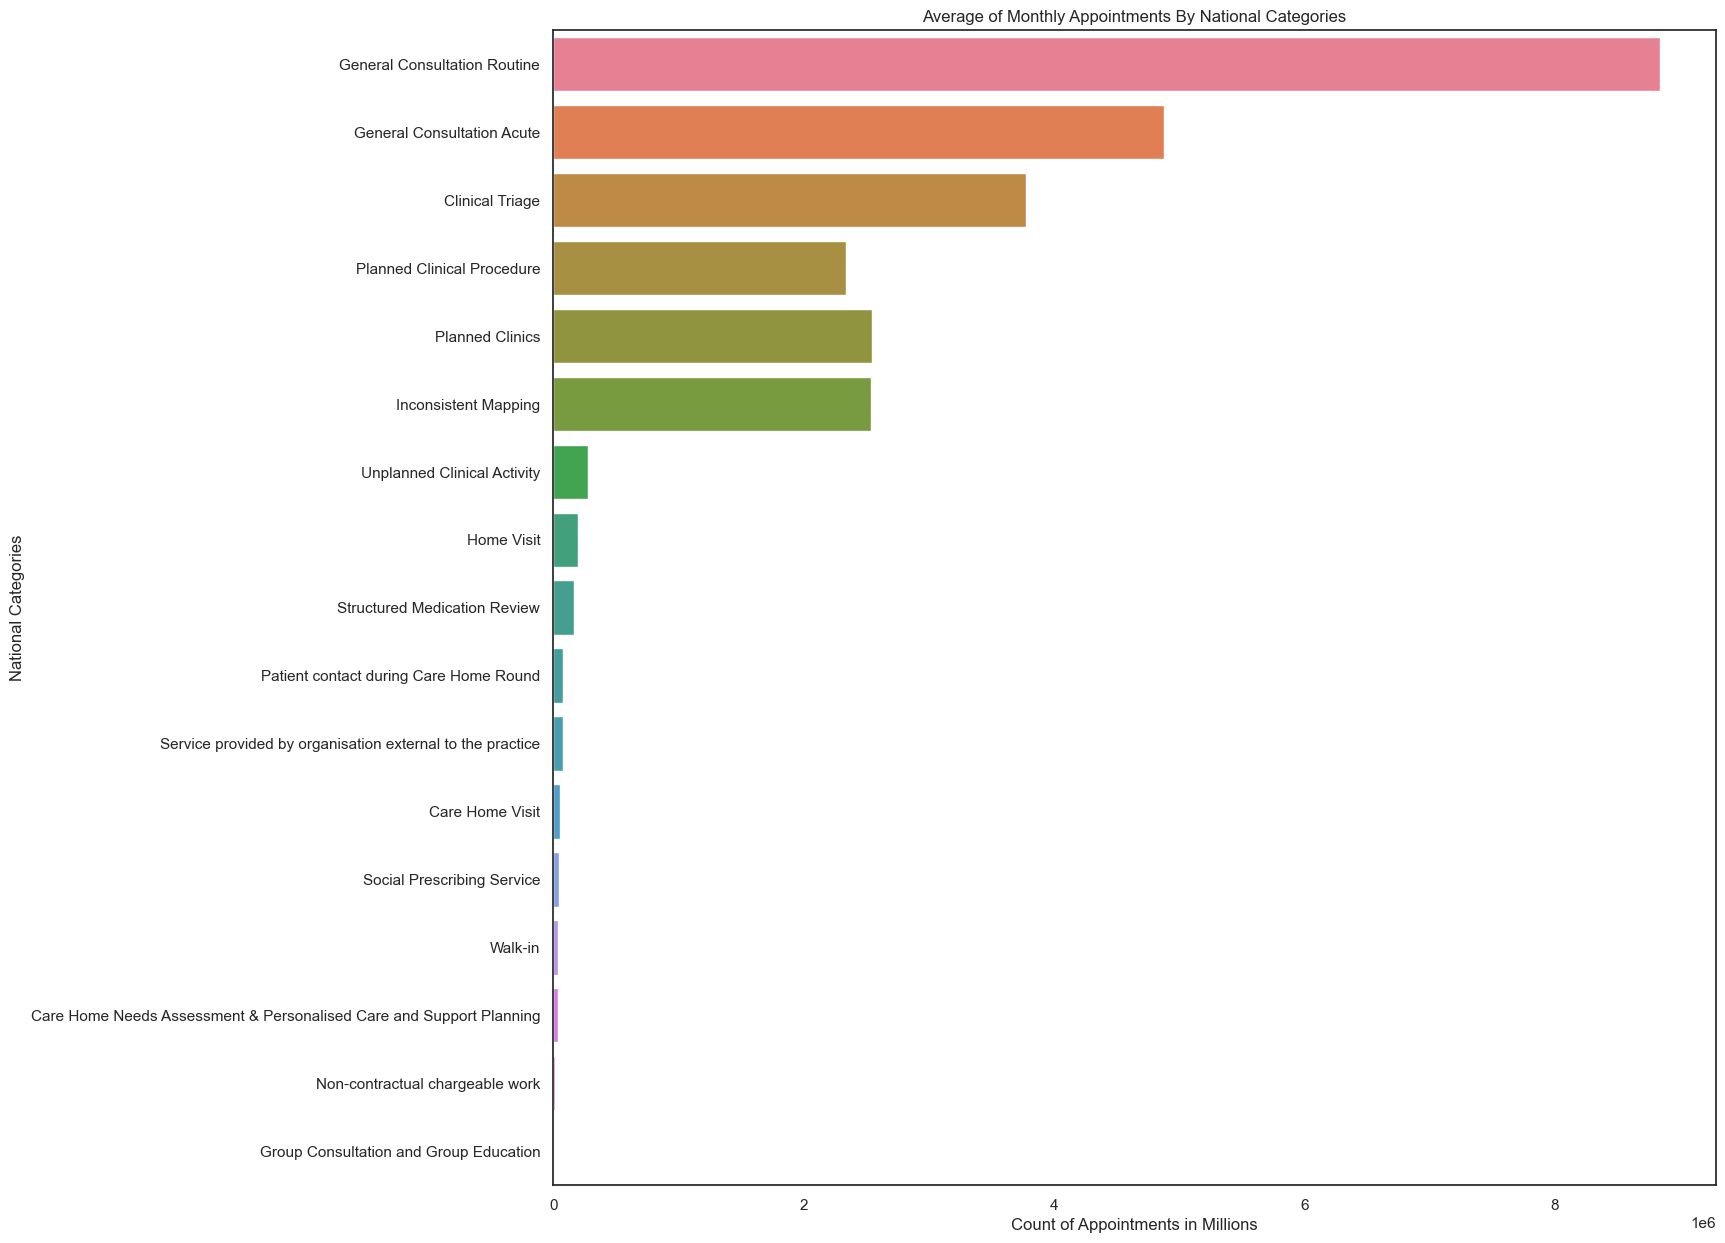

In [140]:
# Create a bar plot for National Categories

fig5, ax13 = plt.subplots(figsize = (15, 15))

# Bar plot for a Monthly Average of Count of Appointments by National Categories
cat_brp1 = sns.barplot(data=cat_appts_nc_monthly_mapped,
                       y='national_category',
                       x='count_of_appointments',
                       estimator='mean',
                       hue='national_category',
                       errorbar=None,
                       ax=ax13)
cat_brp1.set_title('Average of Monthly Appointments By National Categories')
cat_brp1.set_ylabel('National Categories')
cat_brp1.set_xlabel('Count of Appointments in Millions')

In [141]:
# Aggregate the appointments as per Actual Duration for each day and month

dur_appts_ad_monthly = ad.groupby(['appointment_month','actual_duration'])[['count_of_appointments']].sum().reset_index()
dur_appts_ad_monthly = dur_appts_ad_monthly.sort_values('actual_duration')
dur_appts_ad_monthly_known = dur_appts_ad_monthly.loc[dur_appts_ad_monthly['actual_duration'] != 'Unknown / Data Quality']
dur_appts_ad_monthly_known = dur_appts_ad_monthly_known.sort_values('actual_duration')

dur_appts_ad_daily = ad.groupby(['appointment_date','actual_duration'])[['count_of_appointments']].sum().reset_index()
dur_appts_ad_daily = dur_appts_ad_daily.sort_values('count_of_appointments', ascending=False)
dur_appts_ad_daily_known = dur_appts_ad_daily.loc[dur_appts_ad_daily['actual_duration'] != 'Unknown / Data Quality']
dur_appts_ad_daily_known = dur_appts_ad_daily_known.sort_values('count_of_appointments', ascending=False)

# dur_appts_ad_daily_known.head()
dur_appts_ad_monthly_known['actual_duration'].value_counts().index

Index(['1-5 Minutes', '11-15 Minutes', '16-20 Minutes', '21-30 Minutes',
       '31-60 Minutes', '6-10 Minutes'],
      dtype='object', name='actual_duration')

Text(0.5, 0, 'Duration of Appointment')

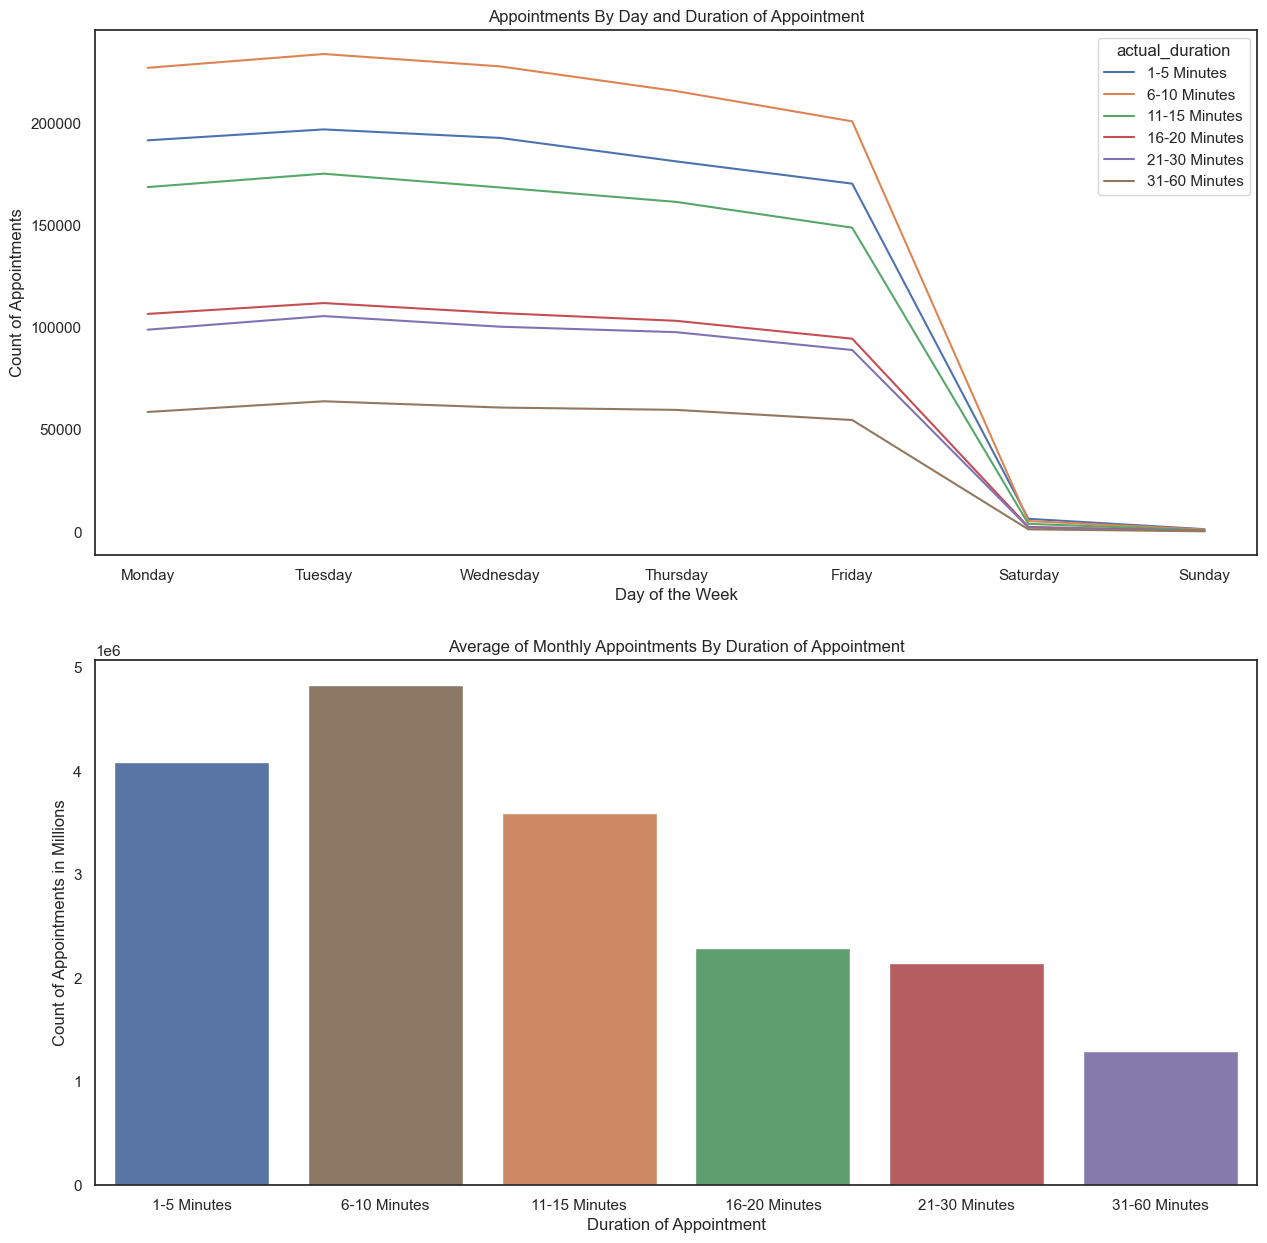

In [142]:
# Create plots for Actual Duration

fig6, (ax14, ax15) = plt.subplots(2, 1, figsize = (15, 15))

# Line plot for an Average of Count of Appointments by Day and Context Type
dur_lp1 = sns.lineplot(data=dur_appts_ad_daily_known,
                       x=dur_appts_ad_daily_known['appointment_date'].dt.day_name(),
                       y='count_of_appointments',
                       estimator='mean',
                       hue='actual_duration',
                       hue_order=['1-5 Minutes', '6-10 Minutes', '11-15 Minutes', '16-20 Minutes', '21-30 Minutes','31-60 Minutes'],
                       errorbar=None,
                       ax=ax14)
dur_lp1.set_title('Appointments By Day and Duration of Appointment')
dur_lp1.set_ylabel('Count of Appointments')
dur_lp1.set_xlabel('Day of the Week')

# Bar plot for a Monthly Average of Count of Appointments by Context Type
dur_brp1 = sns.barplot(data=dur_appts_ad_monthly_known,
                       x='actual_duration',
                       y='count_of_appointments',
                       estimator='mean',
                       hue='actual_duration',
                       order=['1-5 Minutes', '6-10 Minutes', '11-15 Minutes', '16-20 Minutes', '21-30 Minutes','31-60 Minutes'],
                       errorbar=None,
                       ax=ax15)
dur_brp1.set_title('Average of Monthly Appointments By Duration of Appointment')
dur_brp1.set_ylabel('Count of Appointments in Millions')
dur_brp1.set_xlabel('Duration of Appointment')